In [ ]:

from google.colab import drive
drive.mount('/content/drive')

import os
import pickle
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def load_data_from_folder(folder_path):
    train_data_list = []
    test_data_list = []

    # Iterate through sorted subfolders starting with 'Partition'
    for sub_folder in sorted(os.listdir(folder_path)):
        full_path = os.path.join(folder_path, sub_folder)
        if os.path.isdir(full_path) and sub_folder.startswith('Partition'):
            train_file_path = os.path.join(full_path, 'trnData.p')
            test_file_path = os.path.join(full_path, 'tstData.p')

            # Load train data if file exists
            if os.path.exists(train_file_path):
                with open(train_file_path, 'rb') as file:
                    train_data = pickle.load(file)
                    train_data_list.append(train_data)

            # Load test data if file exists
            if os.path.exists(test_file_path):
                with open(test_file_path, 'rb') as file:
                    test_data = pickle.load(file)
                    test_data_list.append(test_data)

    return train_data_list, test_data_list

folder_path = '/content/drive/MyDrive/Data/SMK_CAN'
train_data_list, test_data_list = load_data_from_folder(folder_path)
mean_acc = []

for i, (train_data, test_data) in enumerate(zip(train_data_list, test_data_list)):
    # Split data into features and target
    X_train, y_train = train_data[:, :-1], train_data[:, -1]
    X_test, y_test = test_data[:, :-1], test_data[:, -1]

    # Create DataFrame and save to CSV
    train_df = pd.DataFrame(train_data, columns=[f'feature_{j}' for j in range(train_data.shape[1]-1)] + ['target'])
    test_df = pd.DataFrame(test_data, columns=[f'feature_{j}' for j in range(test_data.shape[1]-1)] + ['target'])

    sub_folder_path = os.path.join(folder_path, f'Partition{i}')  # Adjust index if necessary
    if not os.path.exists(sub_folder_path):
        os.makedirs(sub_folder_path)

    train_df.to_csv(os.path.join(sub_folder_path, 'train_data.csv'), index=False)
    test_df.to_csv(os.path.join(sub_folder_path, 'test_data.csv'), index=False)

    # Train and evaluate the model
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Partition {i}: Accuracy = {accuracy}")
    mean_acc.append(accuracy)

average_accuracy = sum(mean_acc) / len(mean_acc)
print(f"Mean Accuracy across all partitions: {average_accuracy}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Partition 0: Accuracy = 0.6774193548387096
Partition 1: Accuracy = 0.6236559139784946
Partition 2: Accuracy = 0.6774193548387096
Partition 3: Accuracy = 0.7096774193548387
Partition 4: Accuracy = 0.6236559139784946
Partition 5: Accuracy = 0.6559139784946236
Partition 6: Accuracy = 0.6881720430107527
Partition 7: Accuracy = 0.6774193548387096
Partition 8: Accuracy = 0.6666666666666666
Partition 9: Accuracy = 0.7096774193548387
Partition 10: Accuracy = 0.6774193548387096
Partition 11: Accuracy = 0.6774193548387096
Partition 12: Accuracy = 0.6236559139784946
Partition 13: Accuracy = 0.6666666666666666
Partition 14: Accuracy = 0.6881720430107527
Partition 15: Accuracy = 0.6774193548387096
Partition 16: Accuracy = 0.6344086021505376
Partition 17: Accuracy = 0.6344086021505376
Partition 18: Accuracy = 0.6881720430107527
Partition 19: Accuracy = 0.6559139784946236
M

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition18/train_data.csv


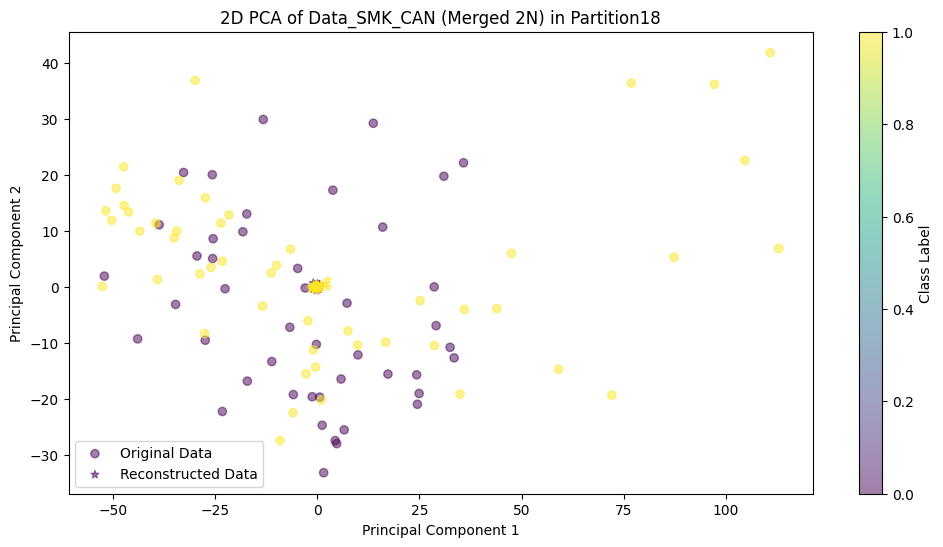

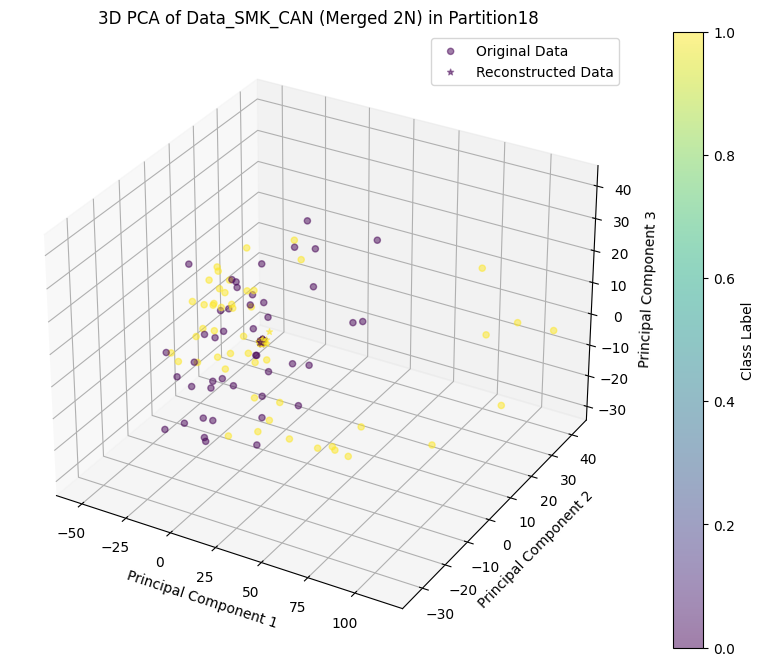

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition19/train_data.csv


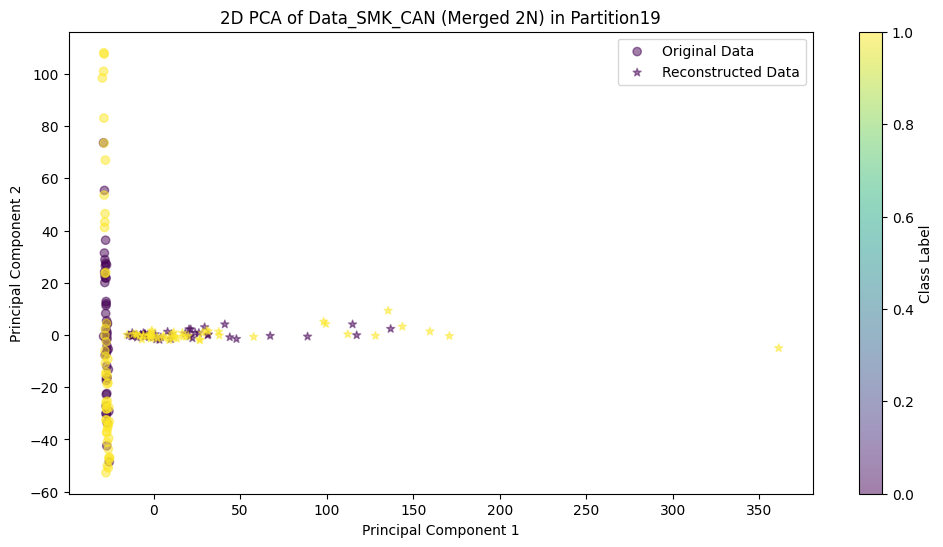

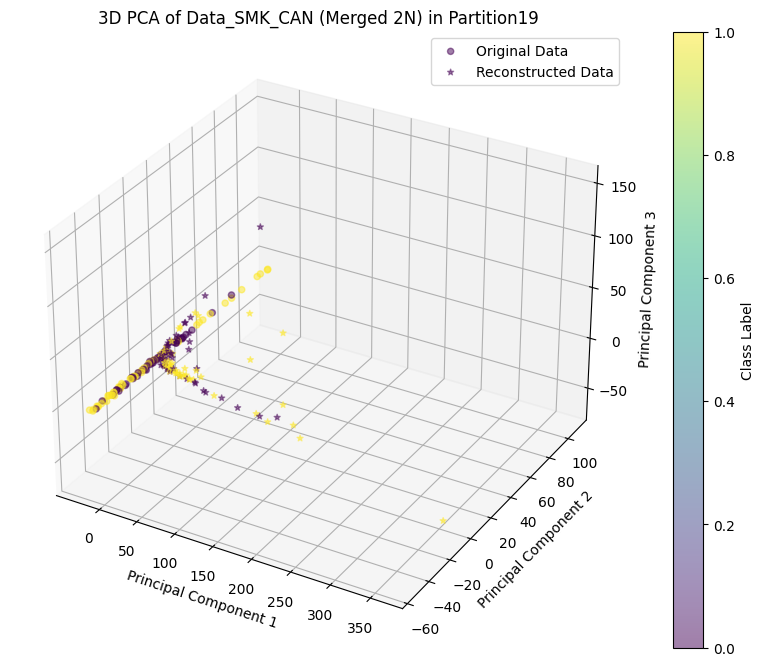

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition11/train_data.csv


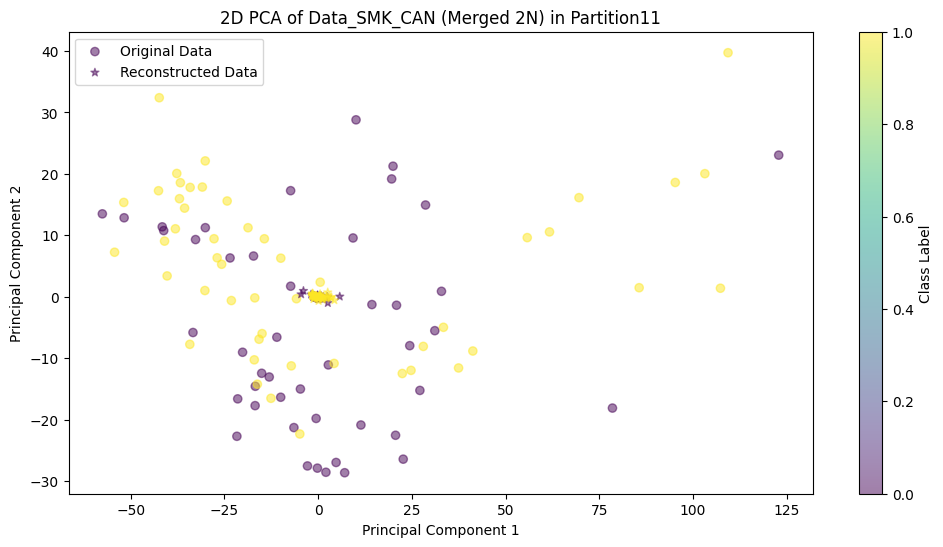

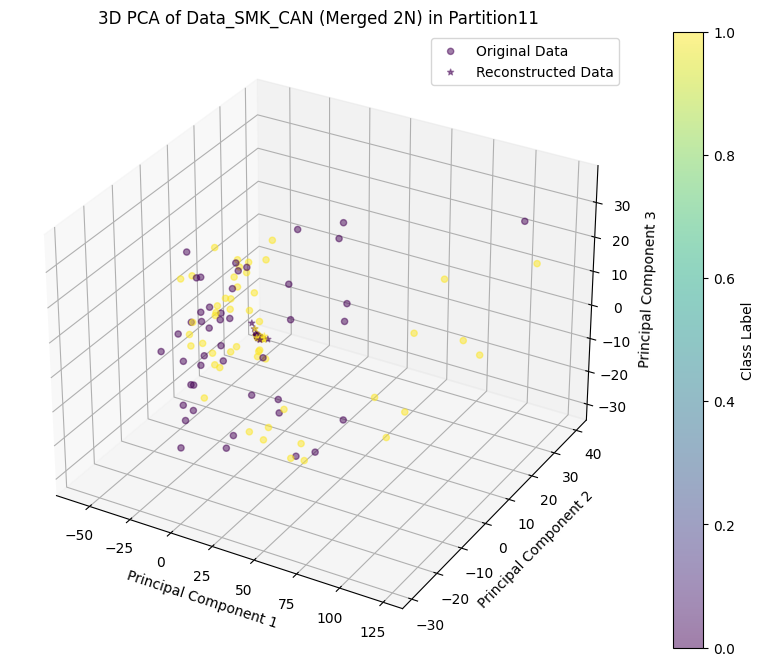

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition16/train_data.csv


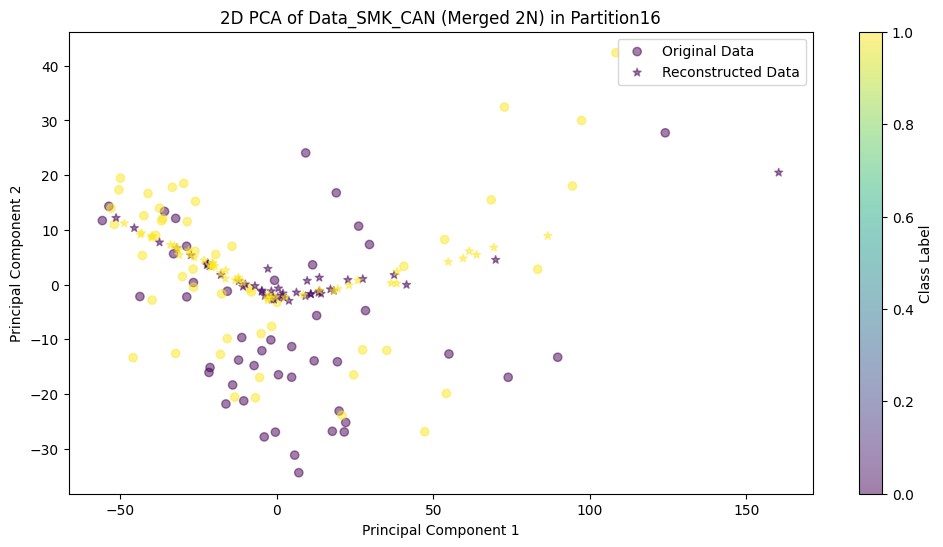

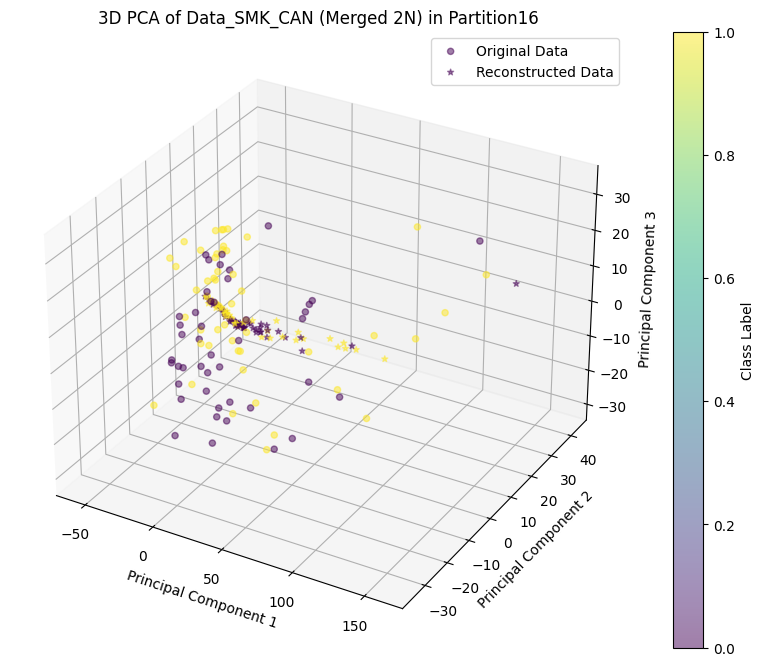

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition17/train_data.csv


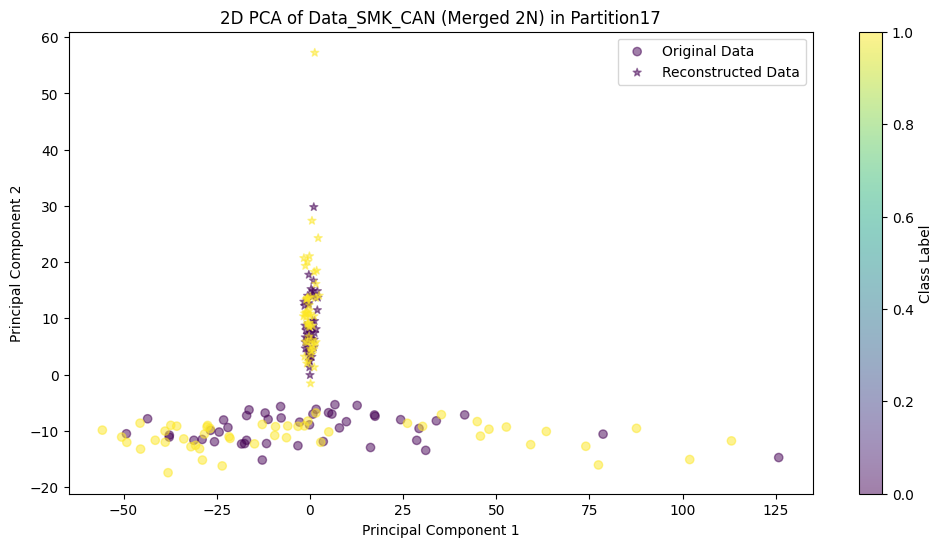

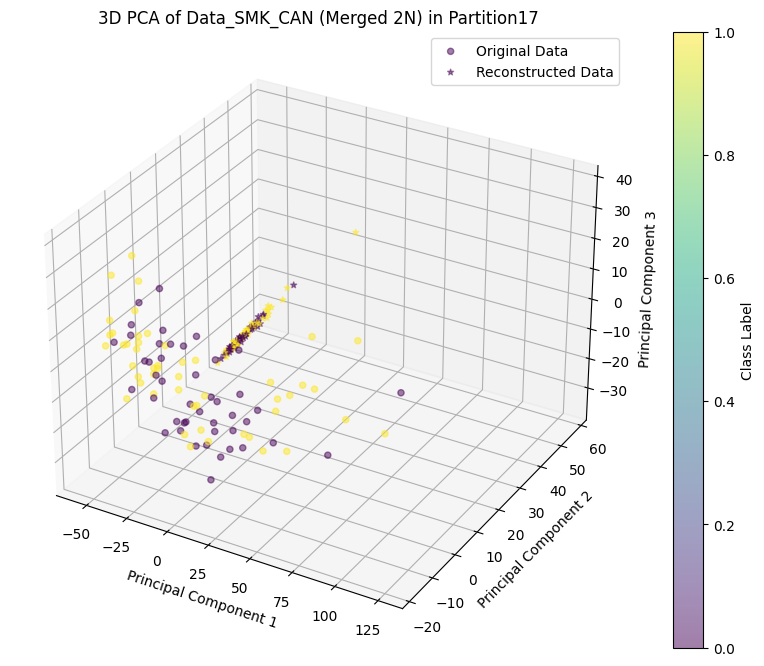

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition10/train_data.csv


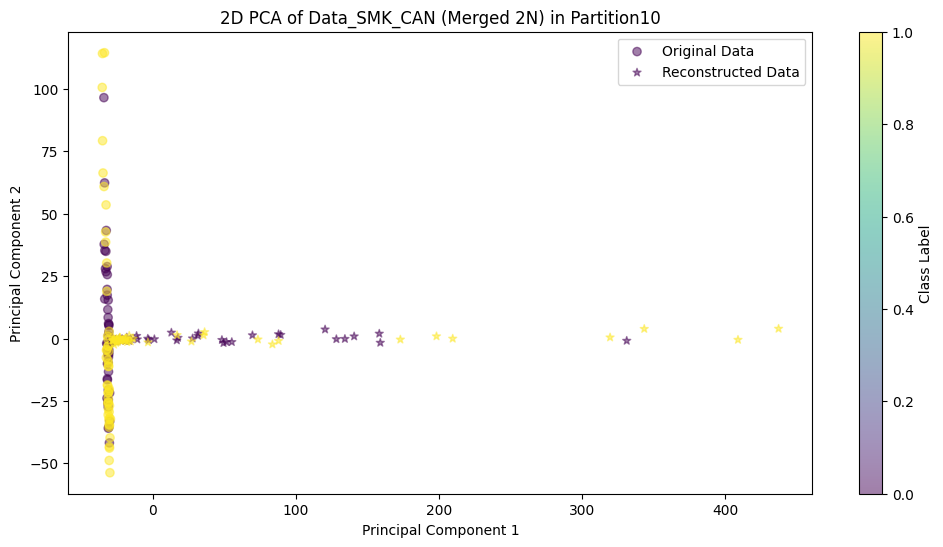

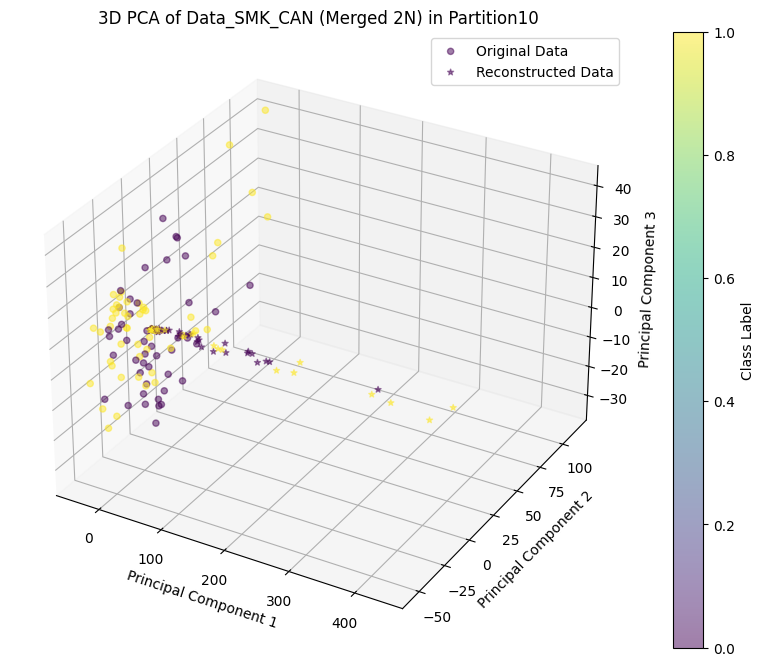

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition9/train_data.csv


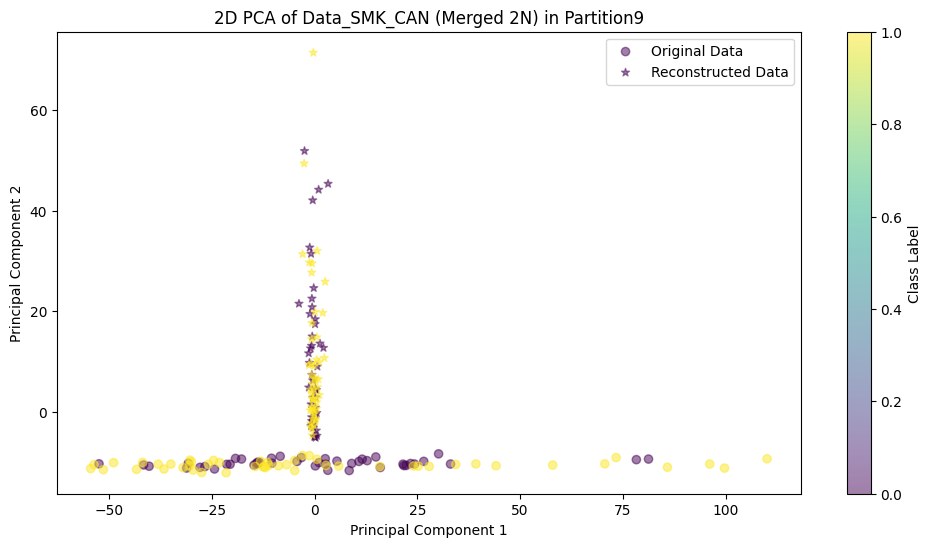

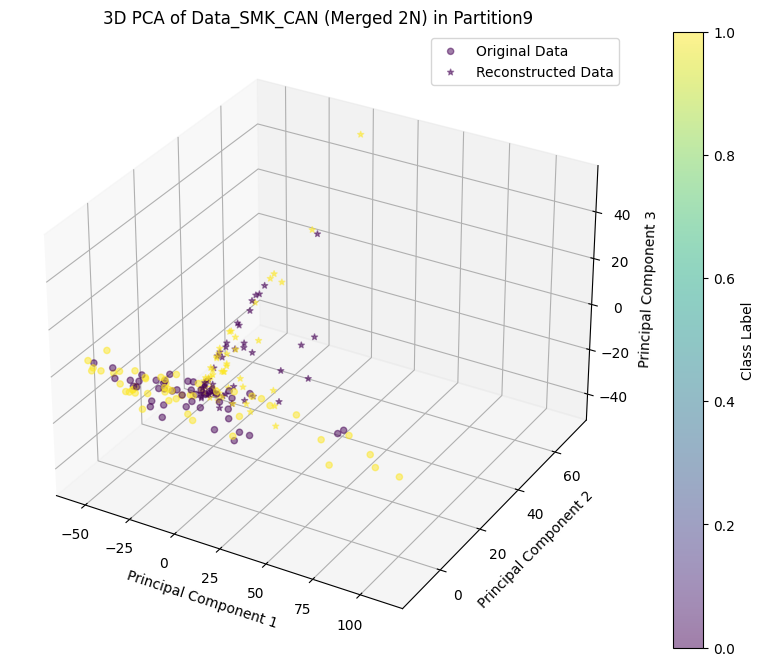

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition6/train_data.csv


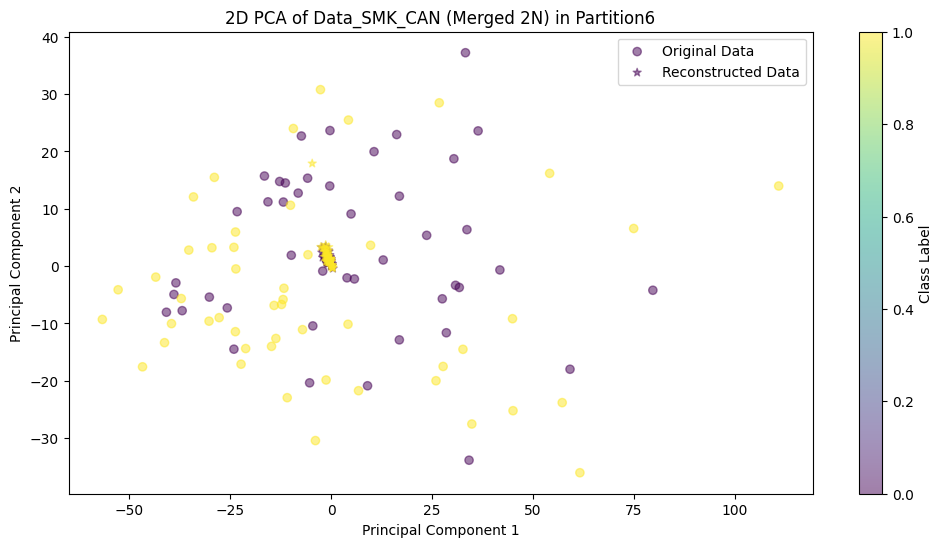

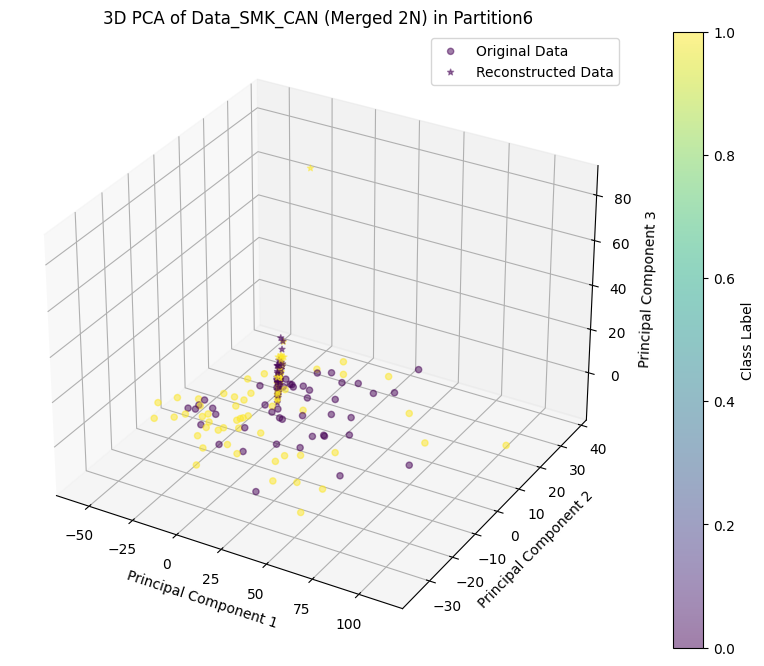

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition7/train_data.csv


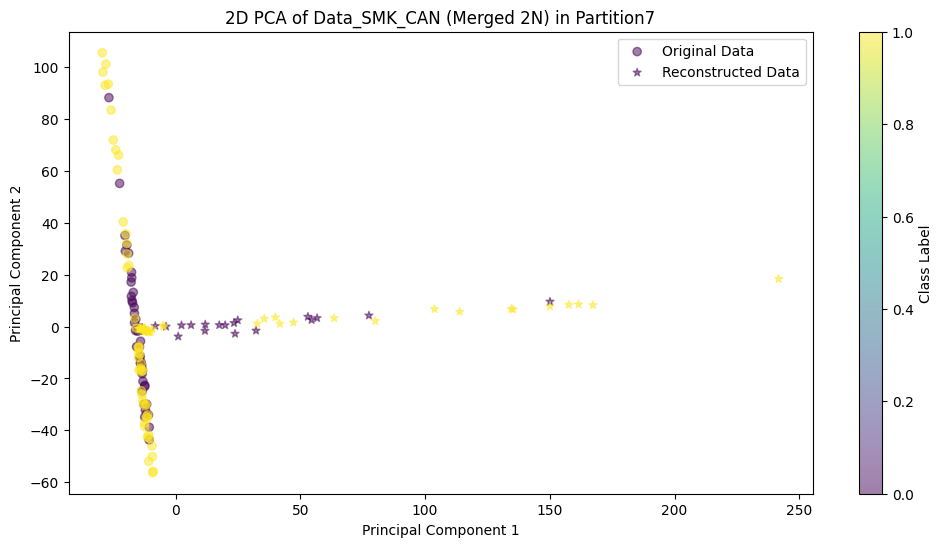

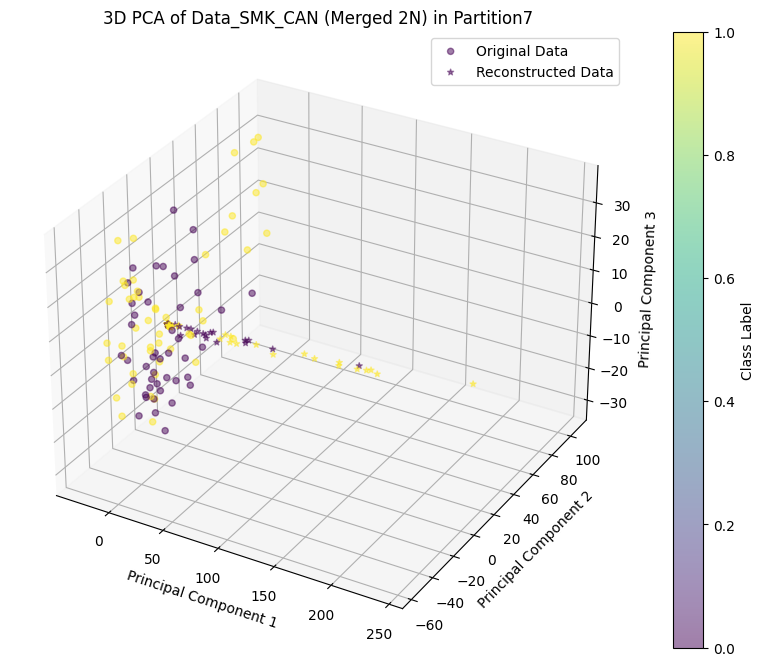

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition0/train_data.csv


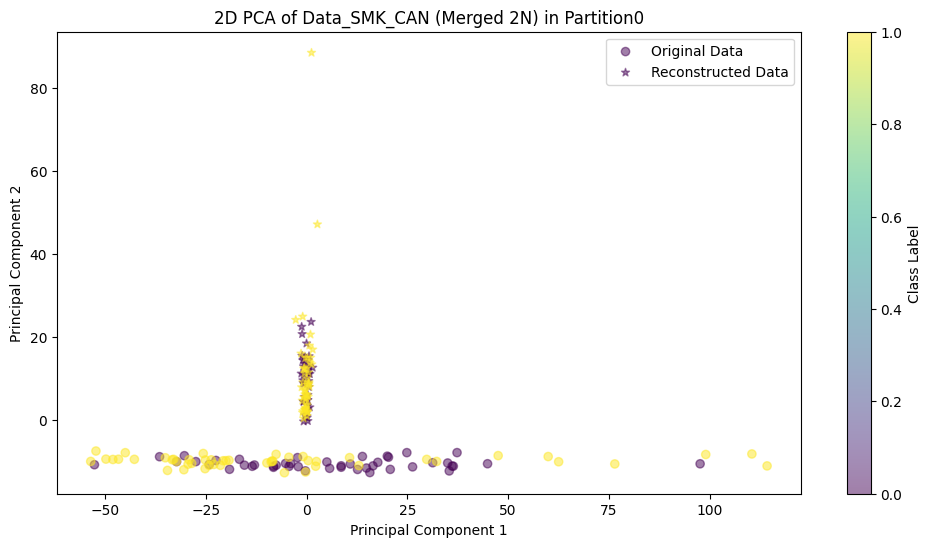

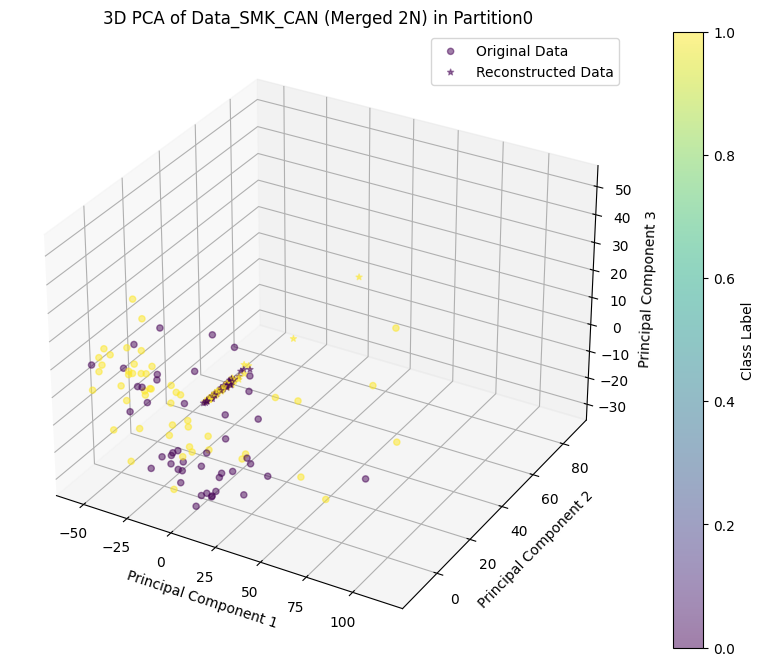

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition13/train_data.csv


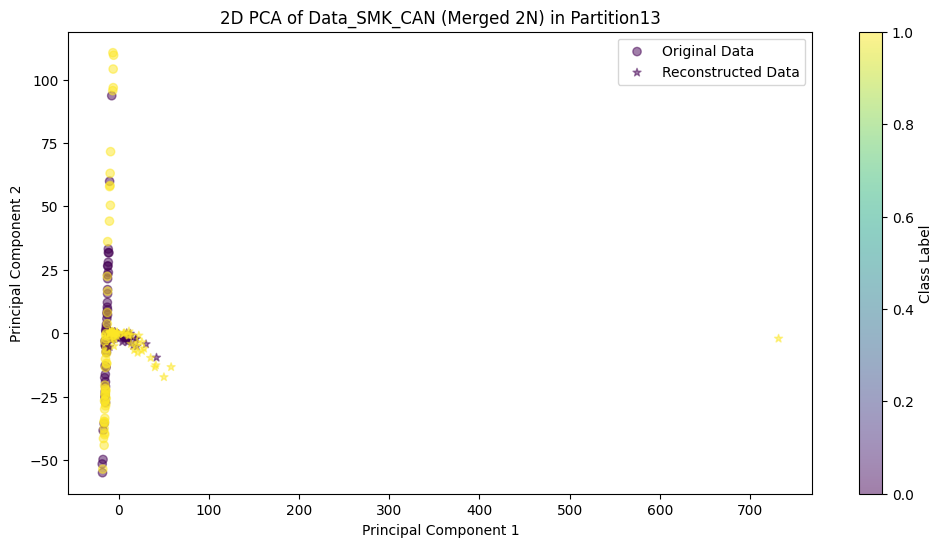

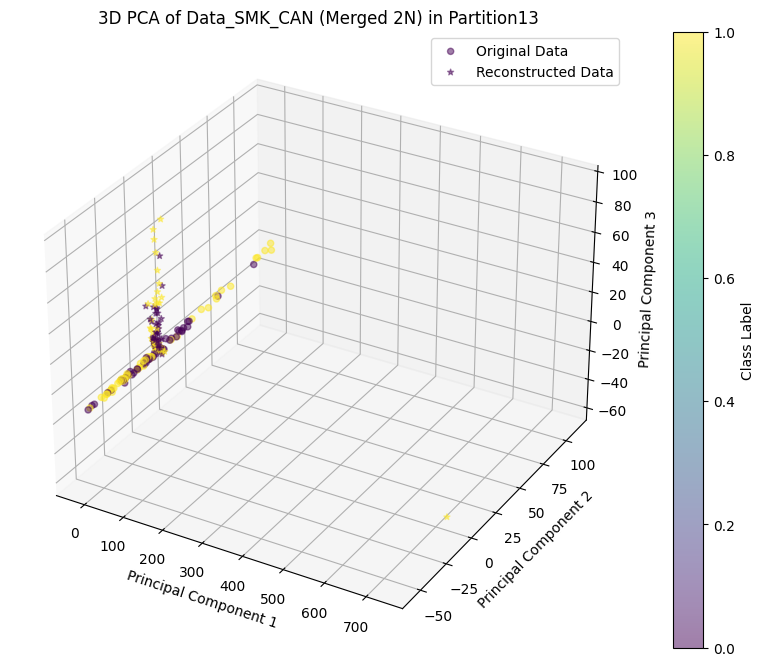

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition1/train_data.csv


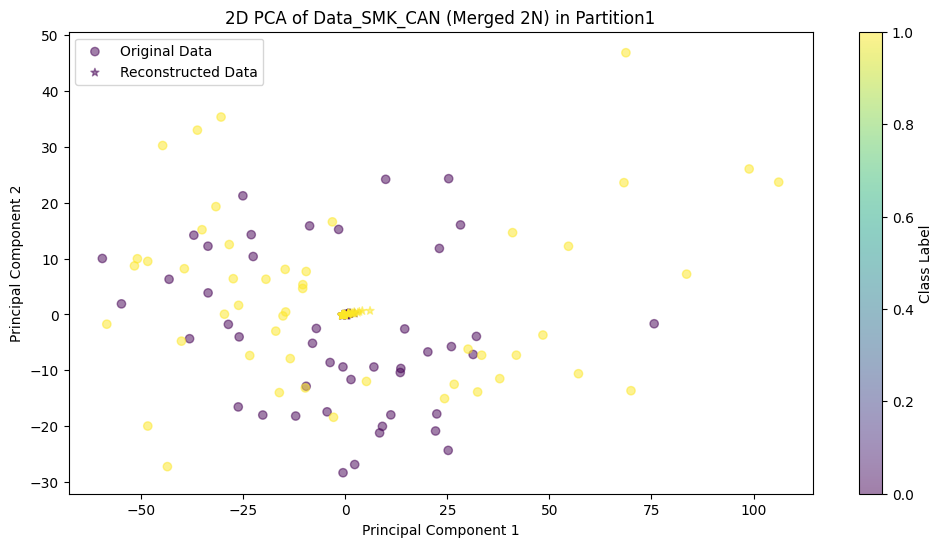

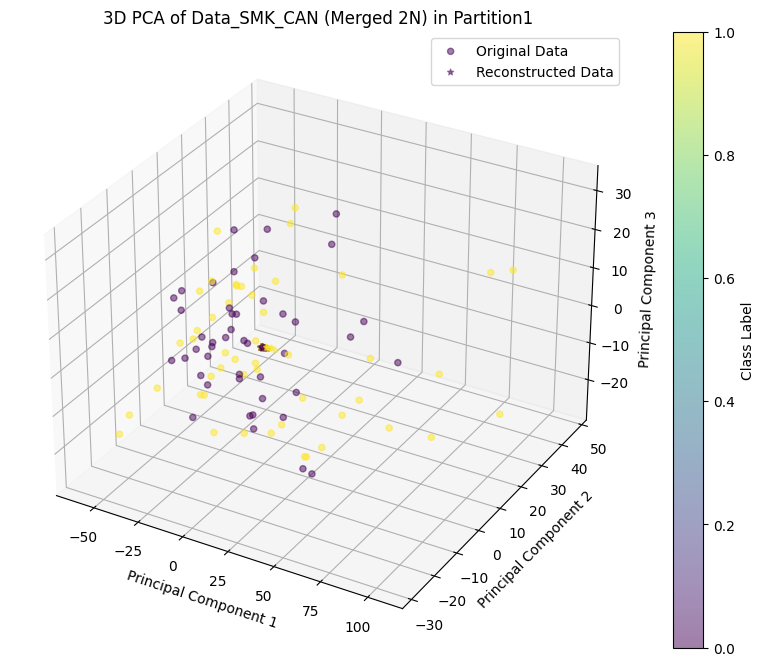

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition8/train_data.csv


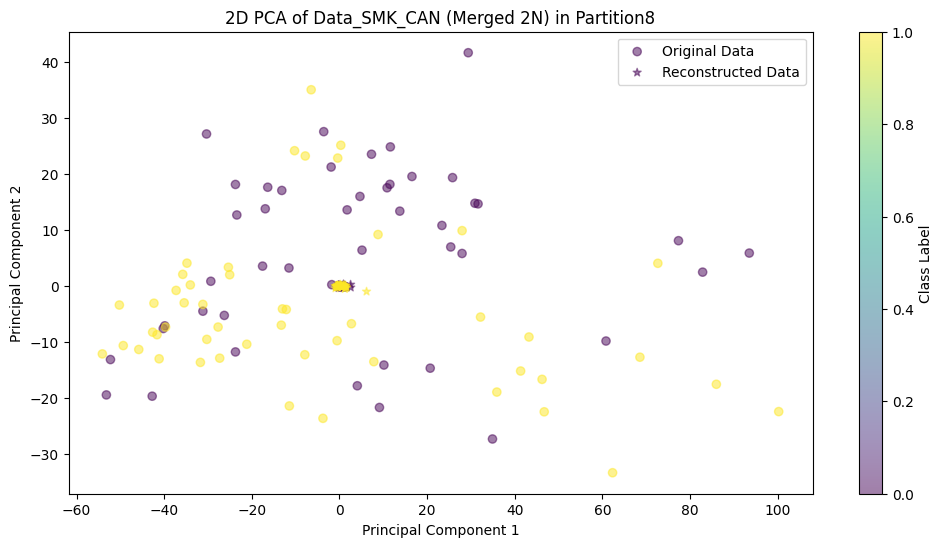

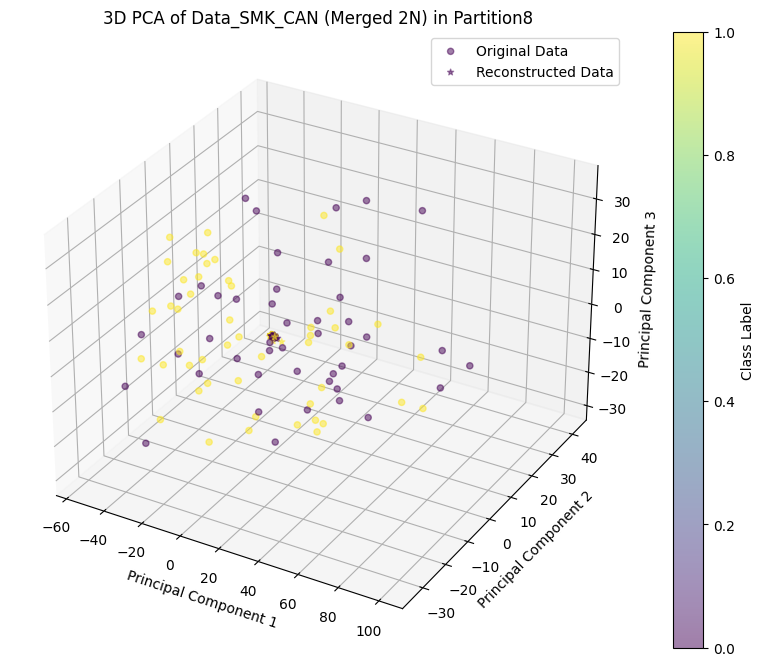

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition15/train_data.csv


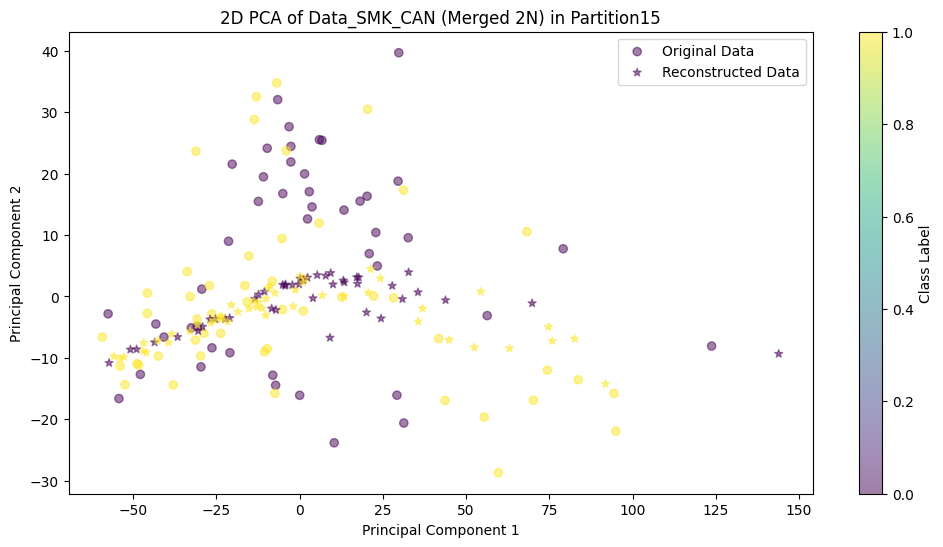

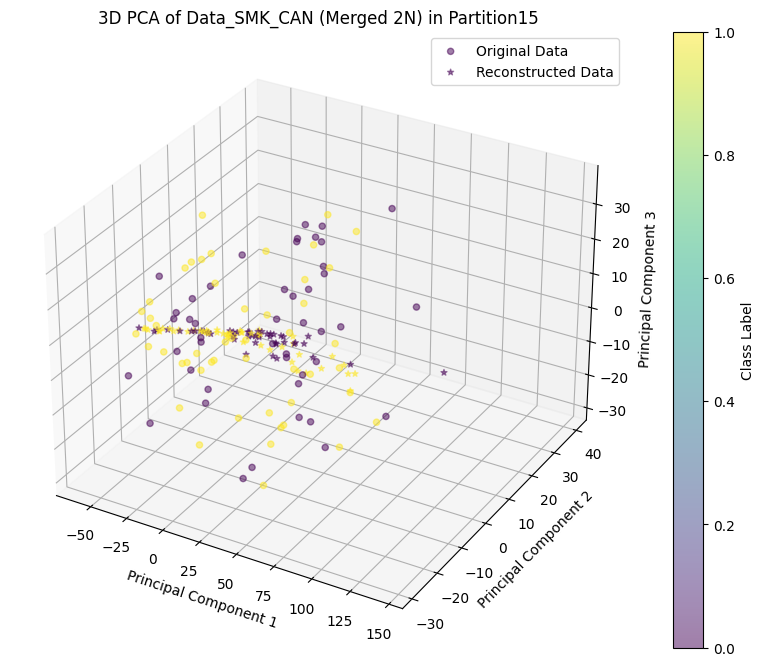

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition12/train_data.csv


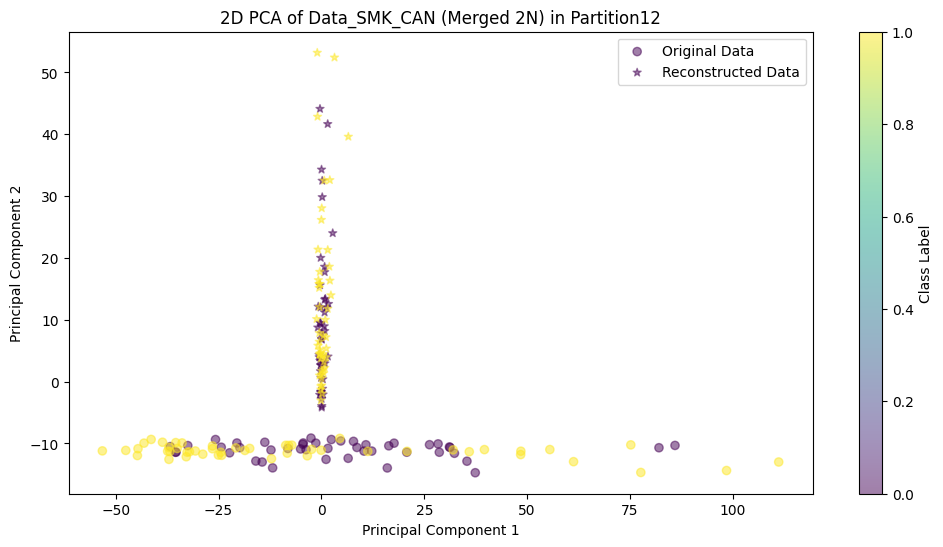

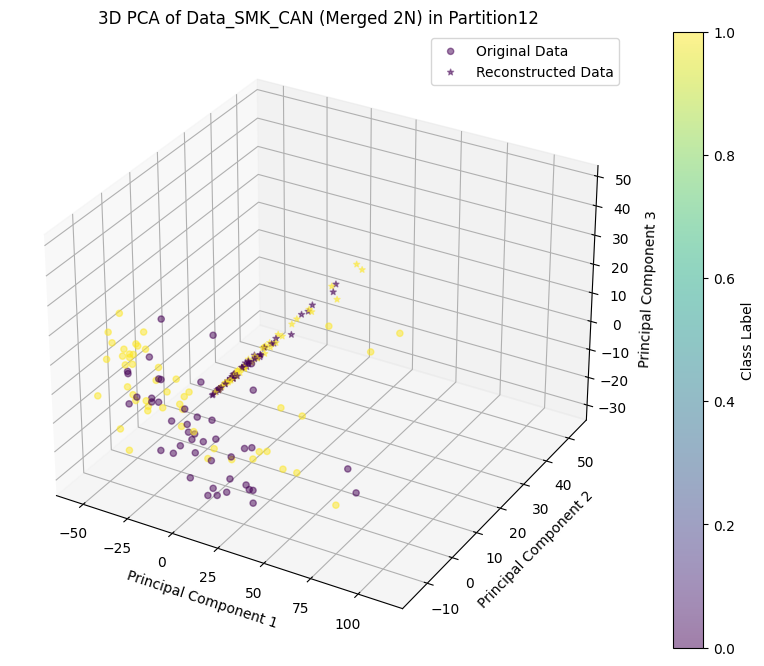

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition14/train_data.csv


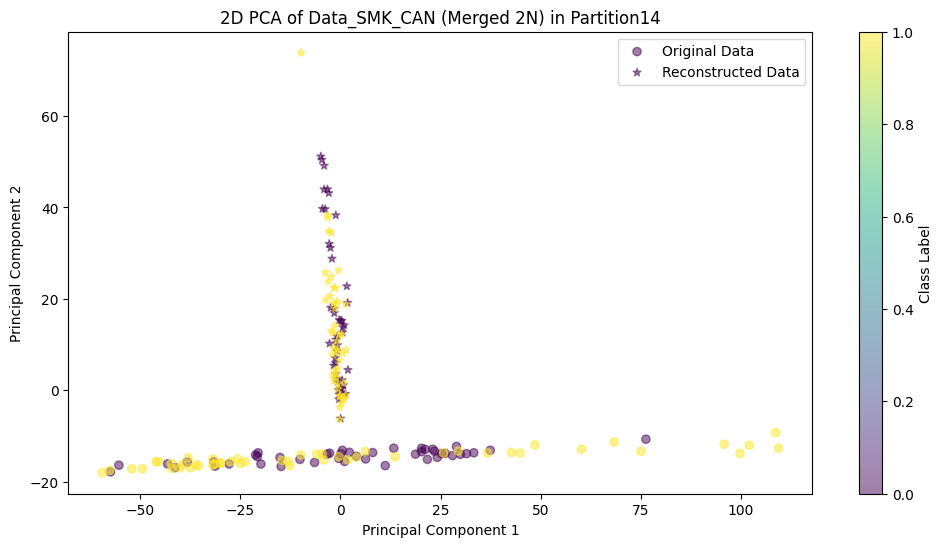

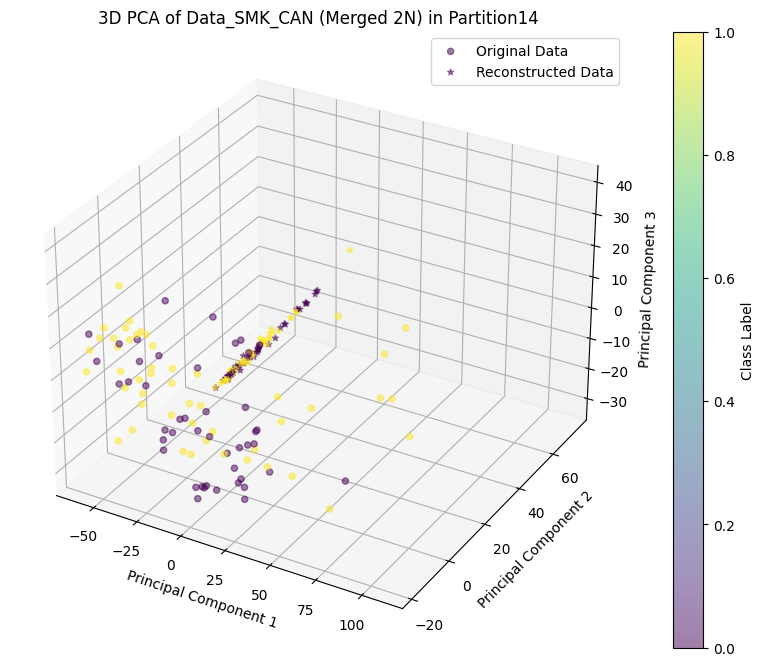

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition4/train_data.csv


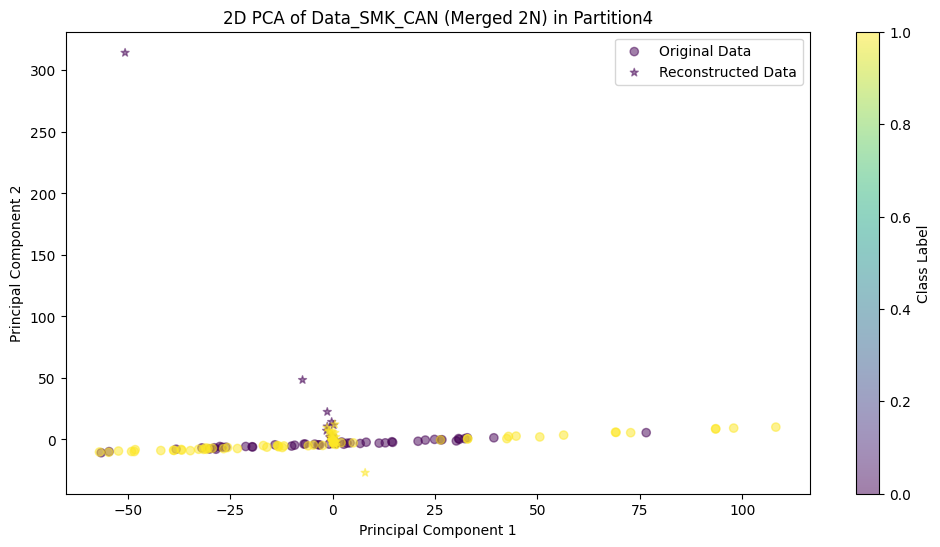

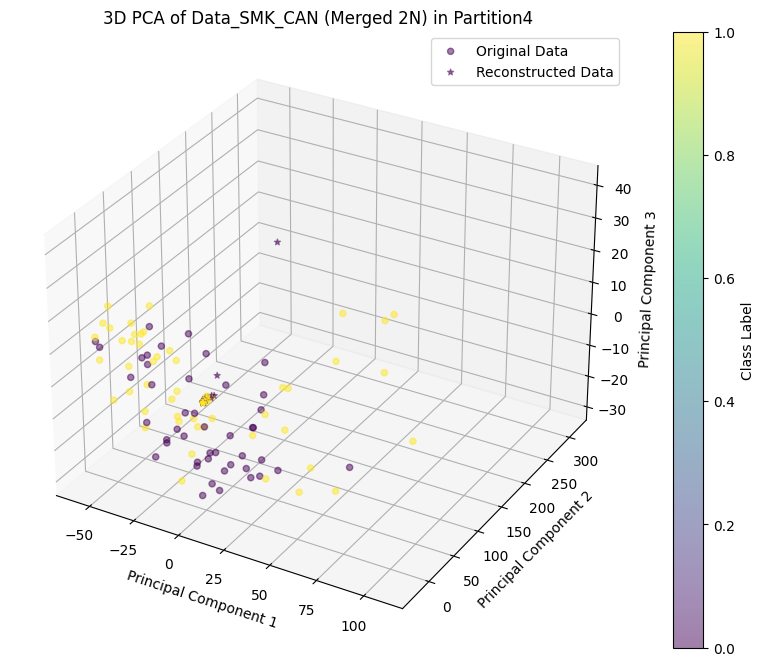

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition3/train_data.csv


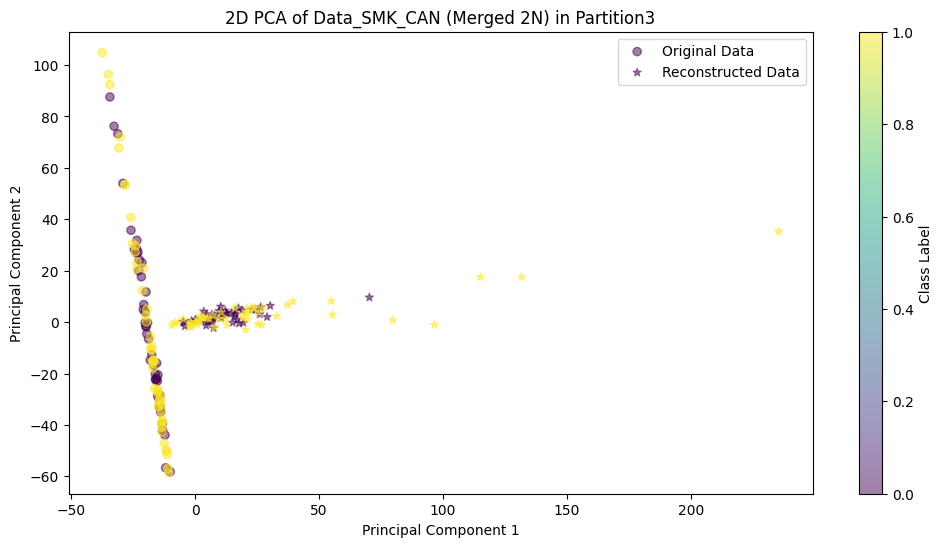

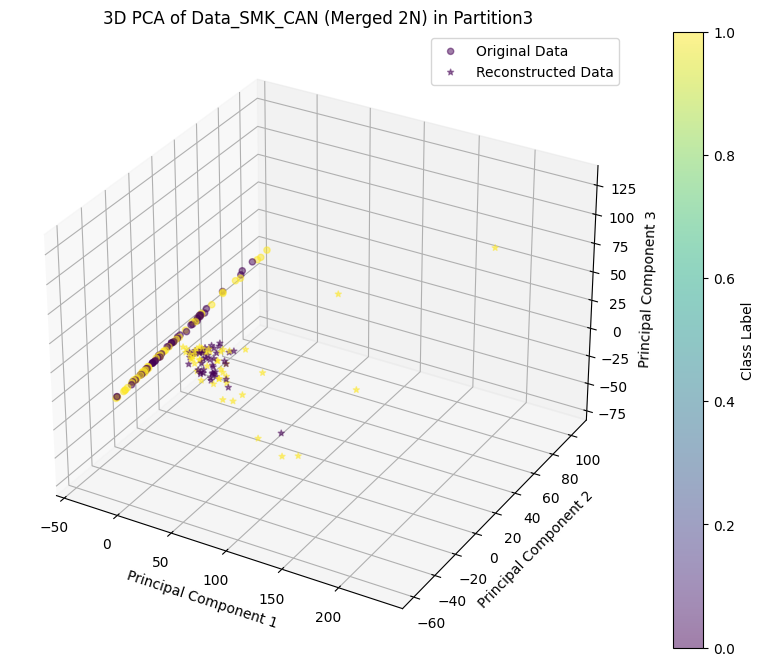

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition2/train_data.csv


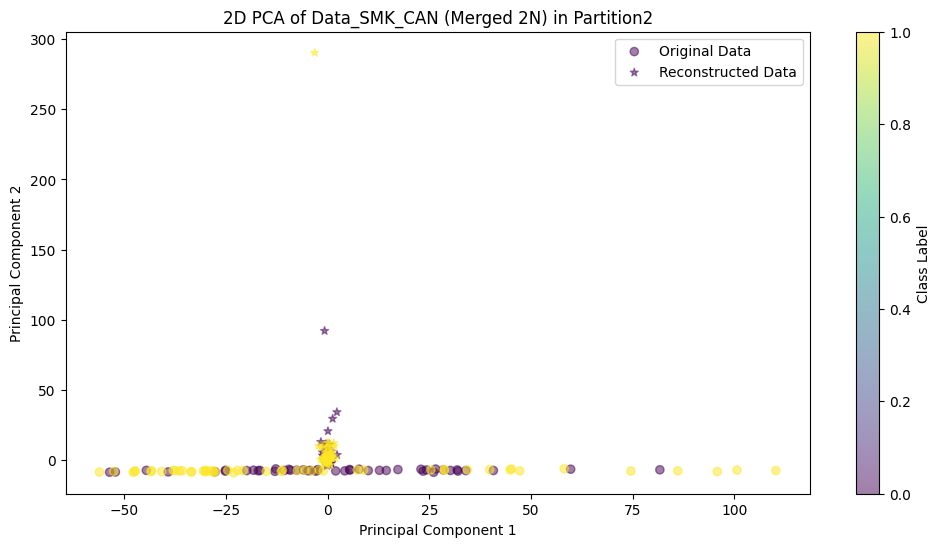

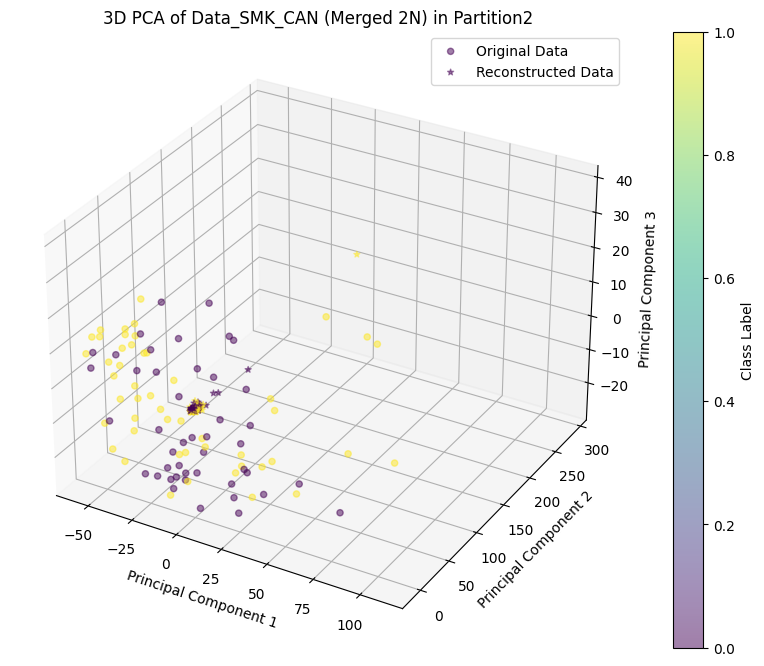

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition5/train_data.csv


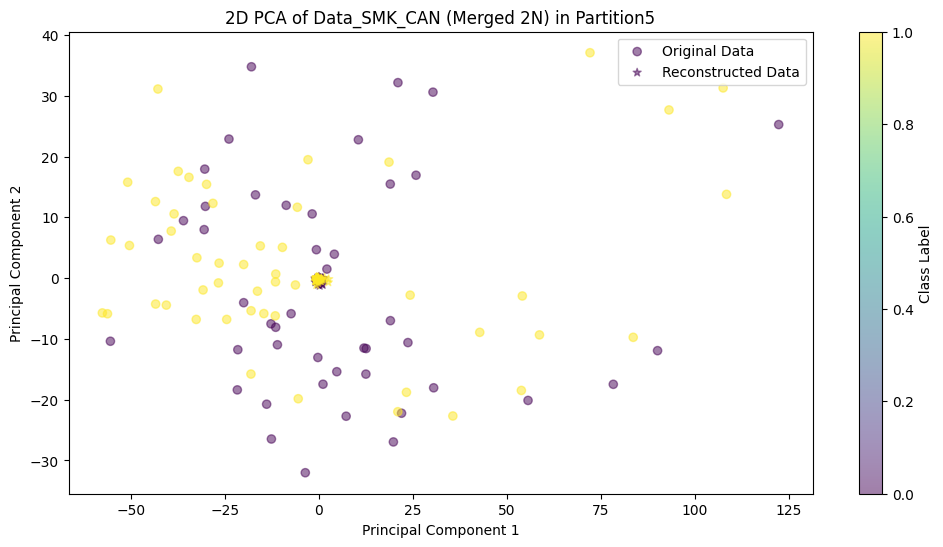

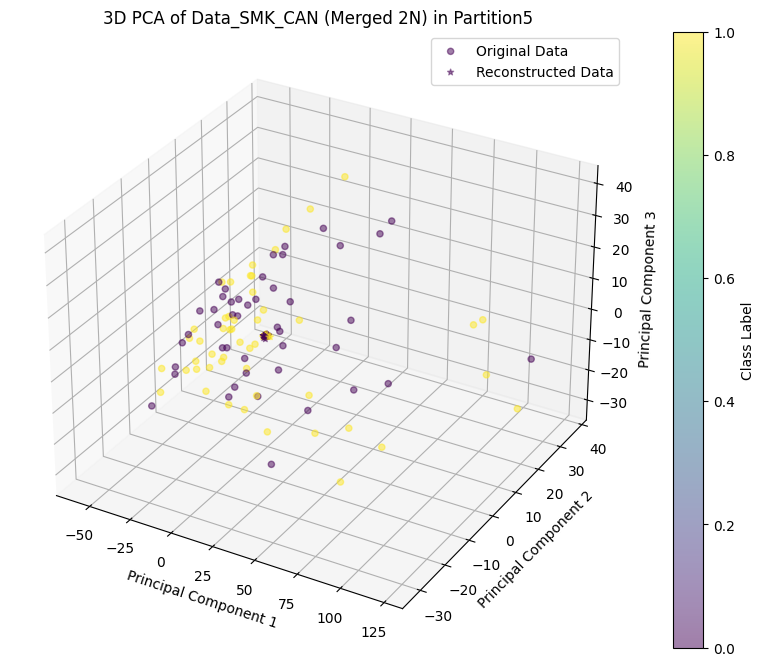

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from torch import nn, optim
from torch.nn import functional as F
import torch.utils.data as Data
from mpl_toolkits.mplot3d import Axes3D  # Import necessary for 3D plotting

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class VAE(nn.Module):
    def __init__(self, data_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(data_dim, 400)
        self.fc21 = nn.Linear(400, 20)  # Latent space dimension can be adjusted
        self.fc22 = nn.Linear(400, 20)
        self.fc3 = nn.Linear(20, 400)
        self.fc4 = nn.Linear(400, data_dim)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return self.fc4(h3)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

def loss_function(recon_x, x, mu, logvar):
    MSE = F.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return MSE + KLD

def process_data(file_path):
    data = np.loadtxt(file_path, delimiter=',', skiprows=1)
    X = data[:, :-1]  # Features
    y = data[:, -1]   # Labels
    data_dim = X.shape[1]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = VAE(data_dim).to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    tensor_data = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    data_loader = Data.DataLoader(tensor_data, batch_size=256, shuffle=True)

    model.train()
    for epoch in range(150):
        for data in data_loader:
            optimizer.zero_grad()
            reconstructed, mu, logvar = model(data)
            loss = loss_function(reconstructed, data, mu, logvar)
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
        reconstructed, _, _ = model(tensor_data)
        reconstructed = reconstructed.cpu().numpy()

    original_data = scaler.inverse_transform(X_scaled)
    reconstructed_data = scaler.inverse_transform(reconstructed)

    combined_data = np.vstack((original_data, reconstructed_data))
    combined_labels = np.concatenate((y, y))
    output_array = np.hstack((combined_data, combined_labels.reshape(-1, 1)))
    np.savetxt(os.path.join(os.path.dirname(file_path), 'combined_train_2n.csv'), output_array, delimiter=',')

    # Save only the reconstructed data as augmented_n.csv
    augmented_data = np.hstack((reconstructed_data, y.reshape(-1, 1)))
    np.savetxt(os.path.join(os.path.dirname(file_path), 'augmented_n.csv'), augmented_data, delimiter=',')

    df_tensor = torch.from_numpy(combined_data).float()
    df_tensor = df_tensor.to('cuda' if torch.cuda.is_available() else 'cpu')  # Adjust as per your device configuration

    x = df_tensor[:, :-1].cpu().numpy()  # Convert to NumPy array and ensure it's on CPU for sklearn
    y = df_tensor[:, -1].int()
    from sklearn.decomposition import PCA
# Apply PCA using sklearn
    pca = PCA(n_components=3)
    combined_data_pca = pca.fit_transform(x)

    # 2D PCA Plot
    plt.figure(figsize=(12, 6))
    plt.scatter(combined_data_pca[:len(original_data), 0], combined_data_pca[:len(original_data), 1],
                c=combined_labels[:len(original_data)], marker='o', label='Original Data', alpha=0.5, cmap='viridis')
    plt.scatter(combined_data_pca[len(original_data):, 0], combined_data_pca[len(original_data):, 1],
                c=combined_labels[len(original_data):], marker='*', label='Reconstructed Data', alpha=0.5, cmap='viridis')
    plt.title(f'2D PCA of Data_SMK_CAN (Merged 2N) in {os.path.basename(os.path.dirname(file_path))}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Class Label')
    plt.legend()
    plt.show()

    # 3D PCA Plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(combined_data_pca[:len(original_data), 0], combined_data_pca[:len(original_data), 1],
                         combined_data_pca[:len(original_data), 2], c=combined_labels[:len(original_data)],
                         marker='o', label='Original Data', alpha=0.5, cmap='viridis')
    ax.scatter(combined_data_pca[len(original_data):, 0], combined_data_pca[len(original_data):, 1],
               combined_data_pca[len(original_data):, 2], c=combined_labels[len(original_data):],
               marker='*', label='Reconstructed Data', alpha=0.5, cmap='viridis')
    ax.set_title(f'3D PCA of Data_SMK_CAN (Merged 2N) in {os.path.basename(os.path.dirname(file_path))}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    fig.colorbar(scatter, ax=ax, label='Class Label')
    ax.legend()
    plt.show()

root_dir = '/content/drive/MyDrive/Data/SMK_CAN'

for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith('train_data.csv'):
            file_path = os.path.join(subdir, file)
            print(f"Processing {file_path}")

            process_data(file_path)
            break




Processing /content/drive/MyDrive/Data/SMK_CAN/Partition18/combined_train_2n.csv


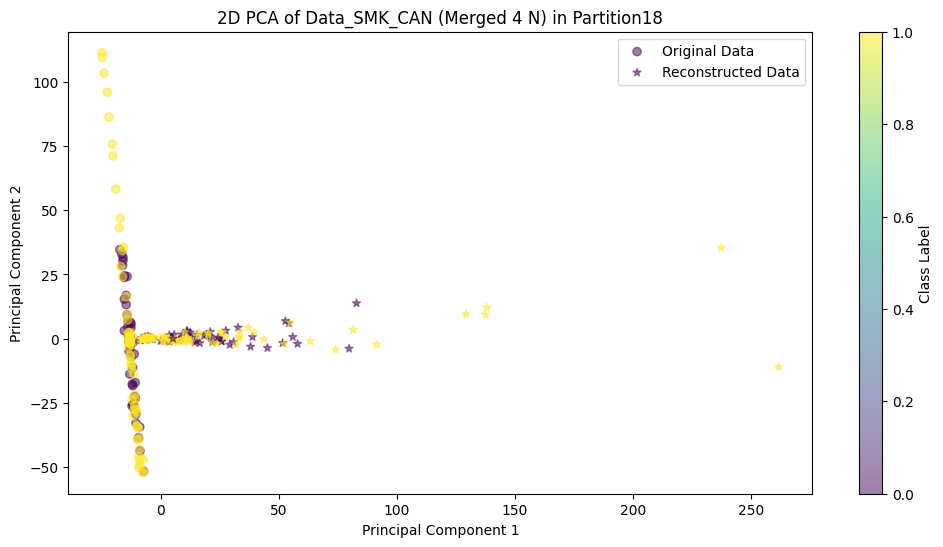

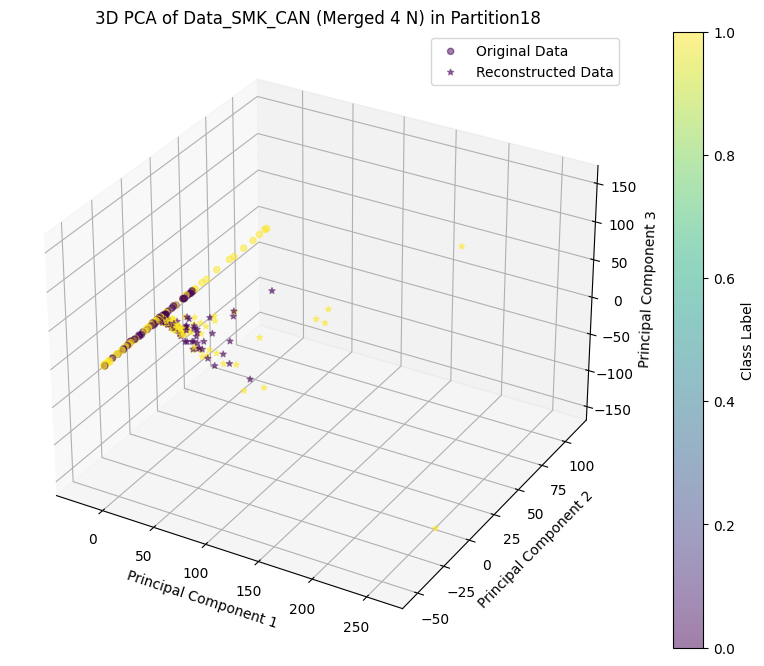

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition19/combined_train_2n.csv


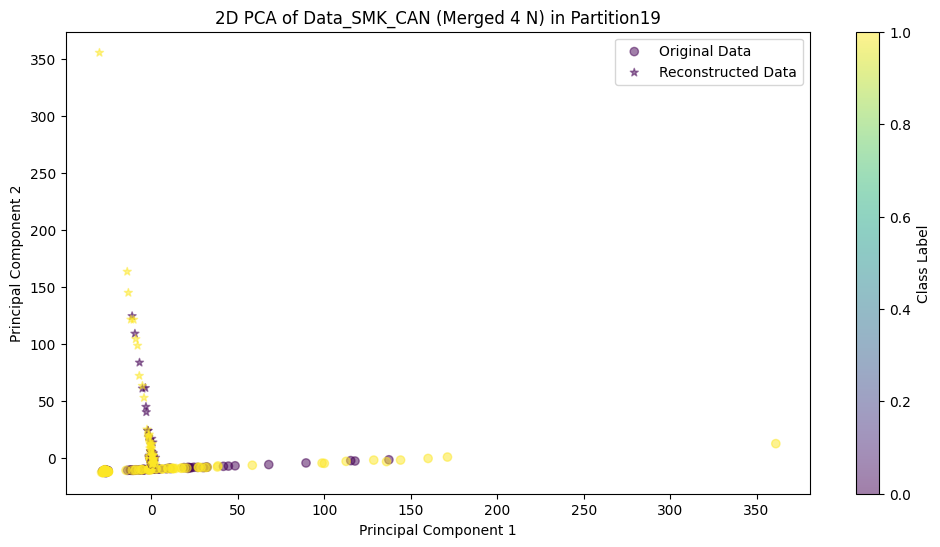

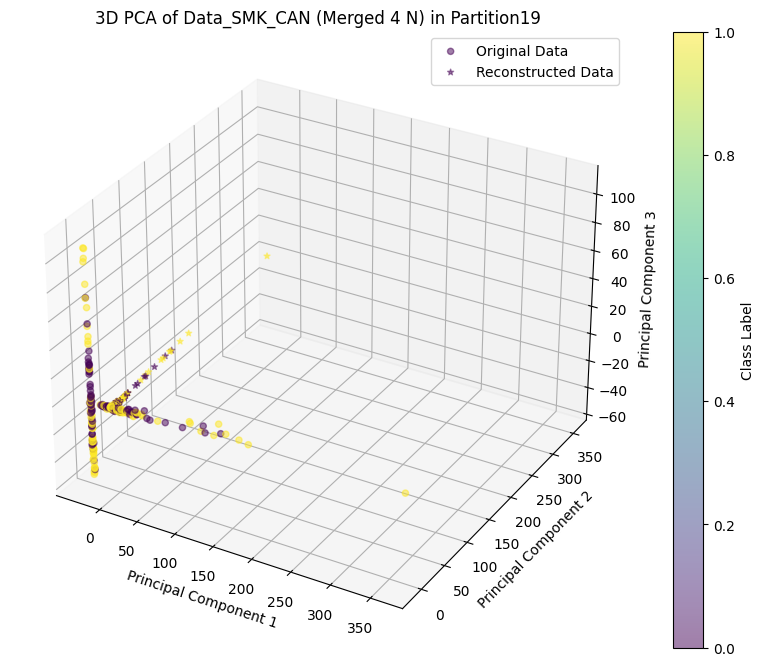

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition11/combined_train_2n.csv


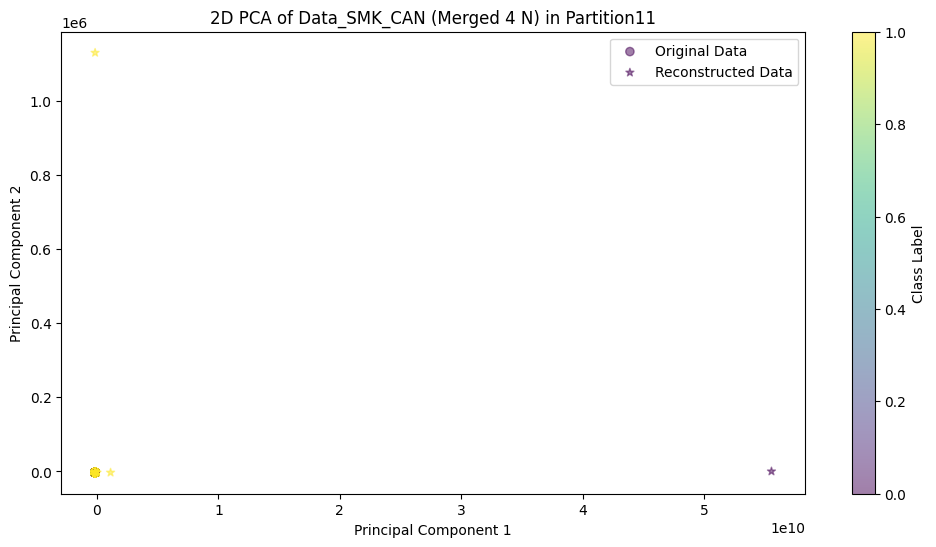

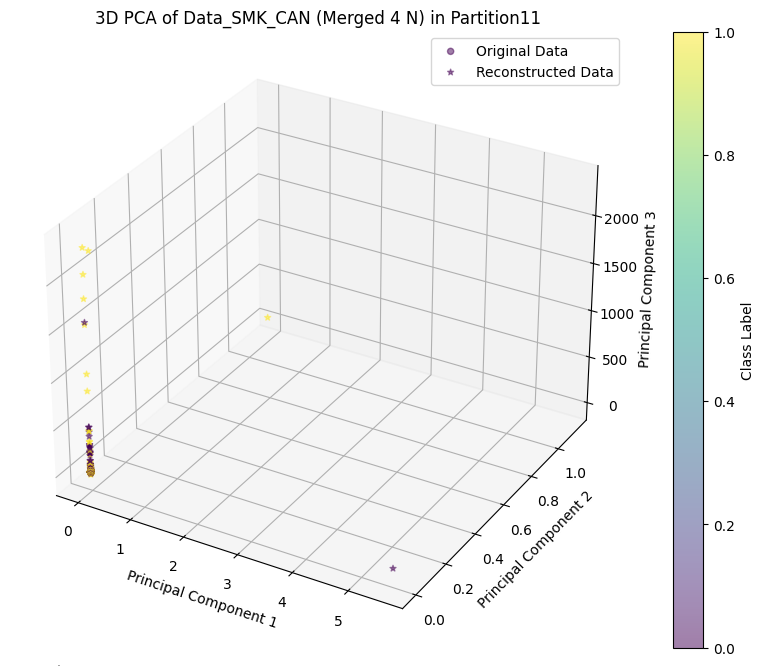

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition16/combined_train_2n.csv


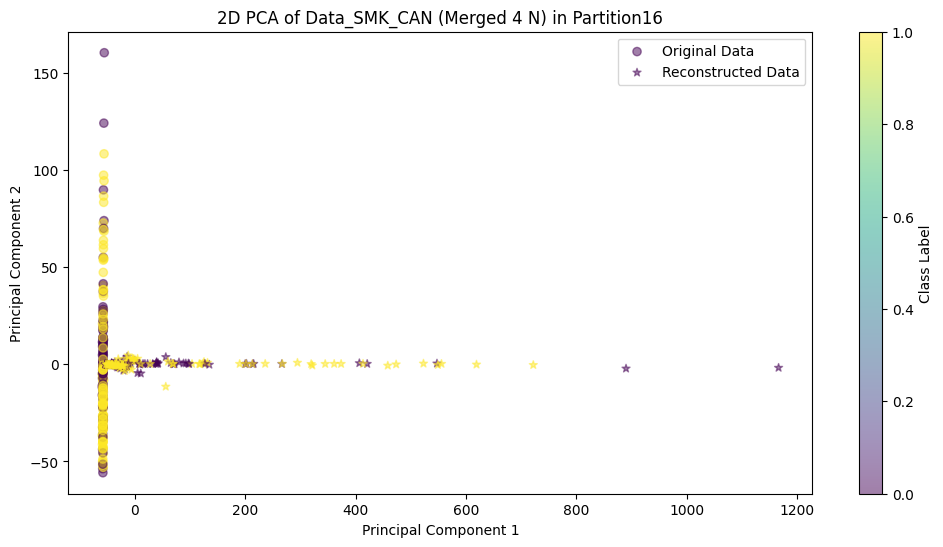

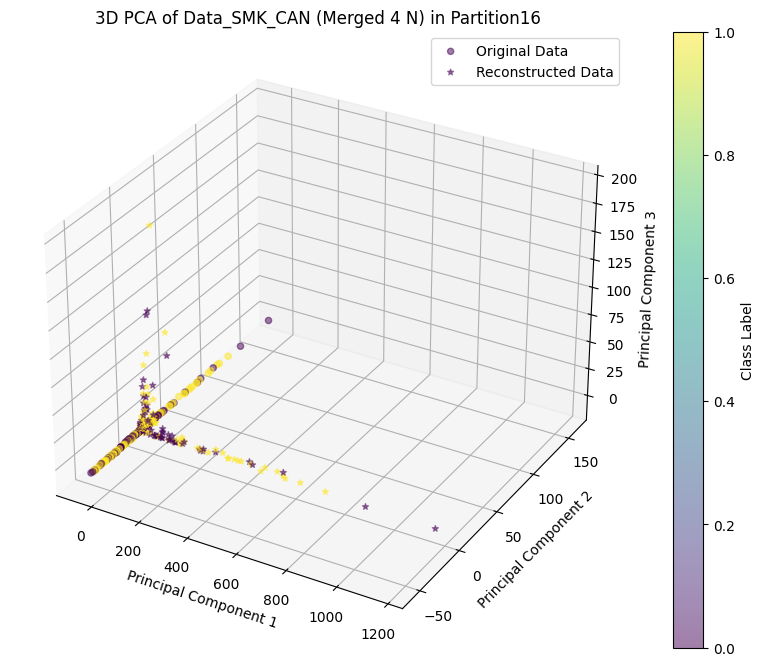

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition17/combined_train_2n.csv


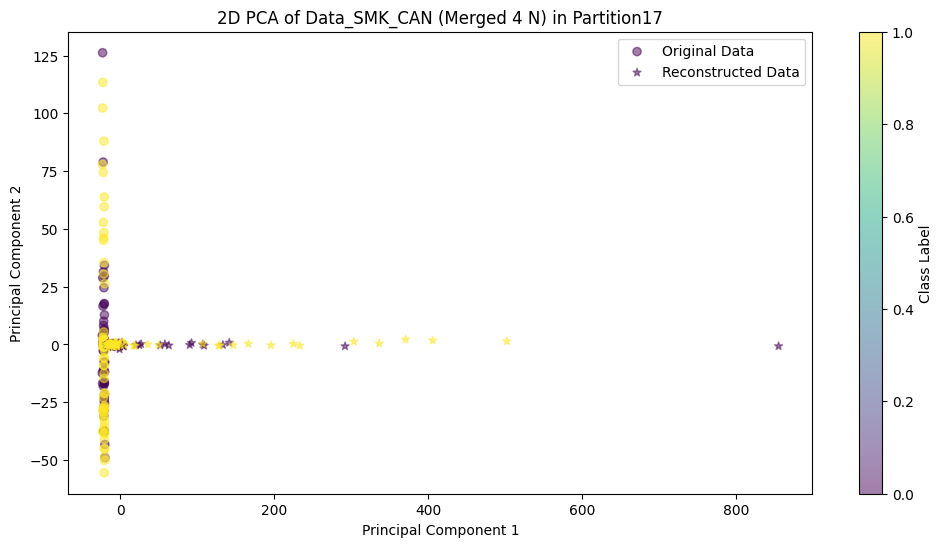

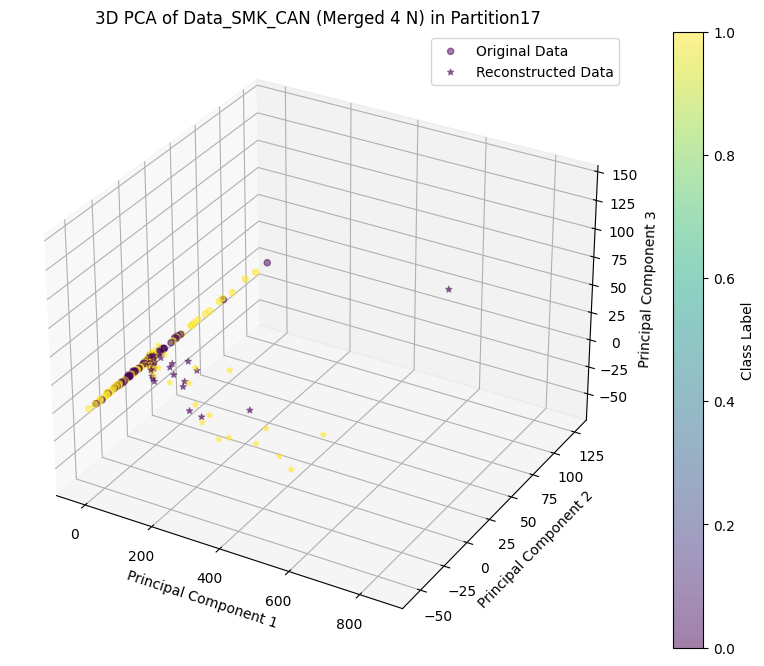

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition10/combined_train_2n.csv


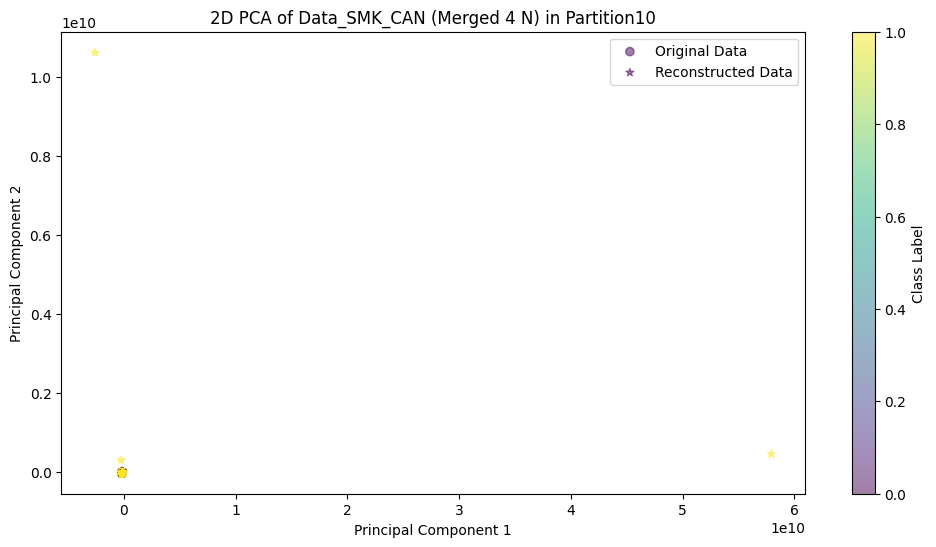

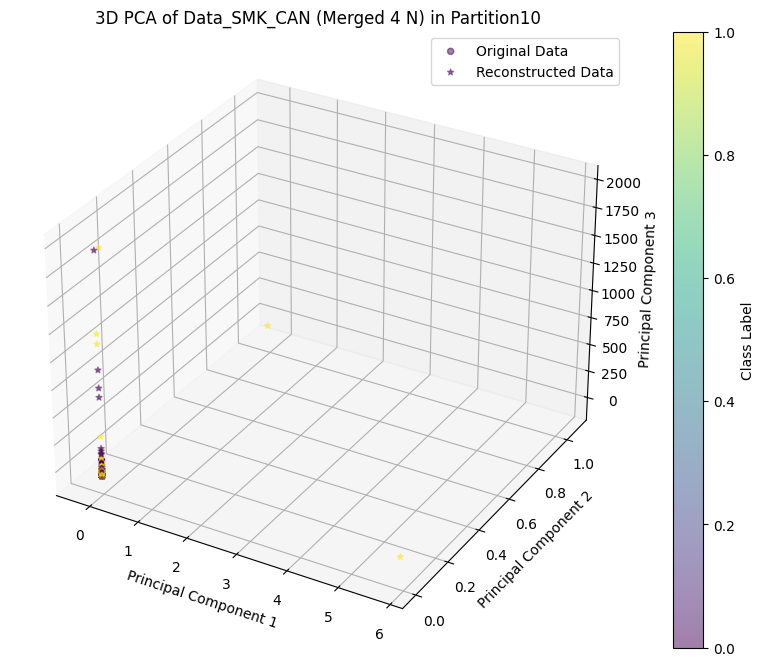

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition9/combined_train_2n.csv


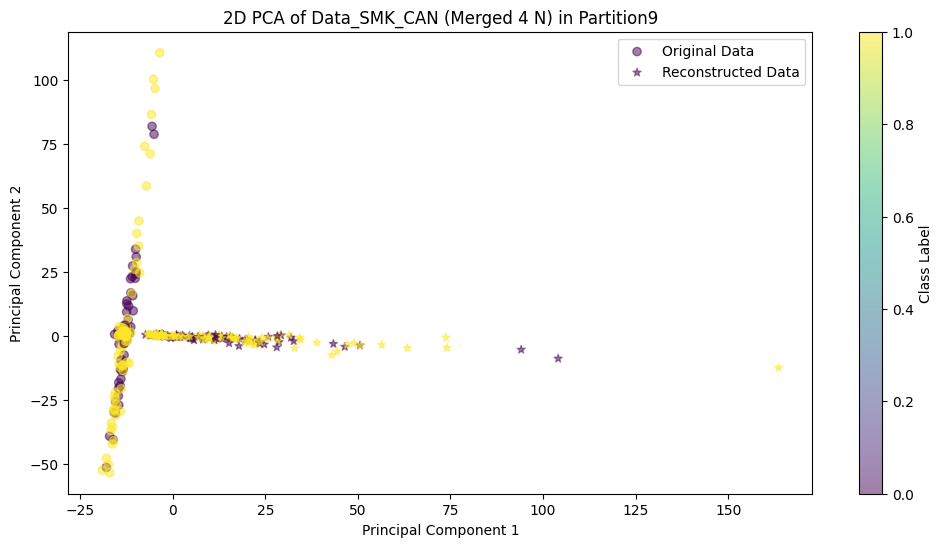

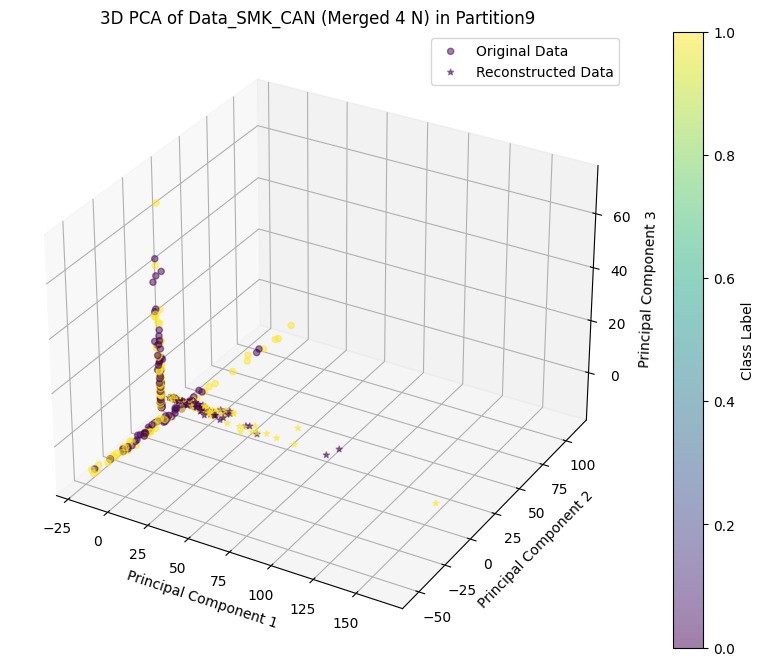

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition6/combined_train_2n.csv


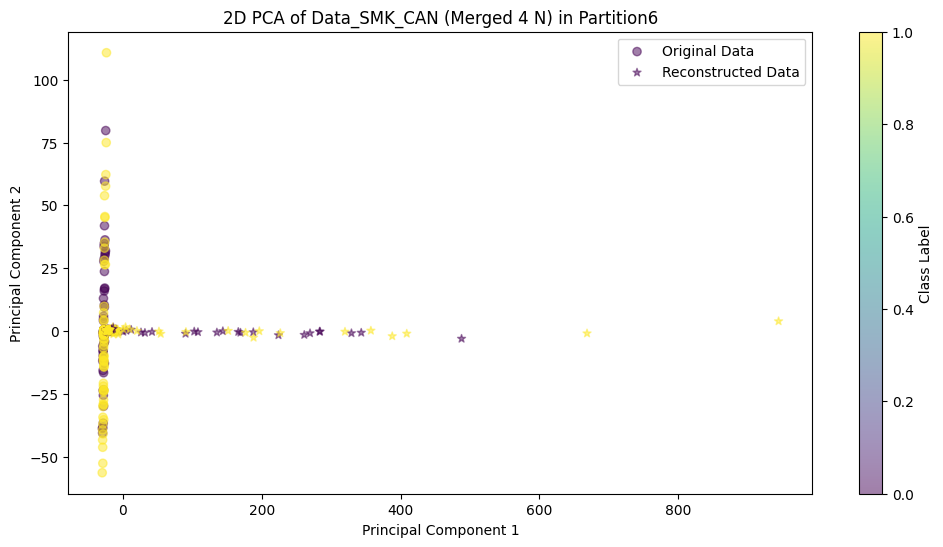

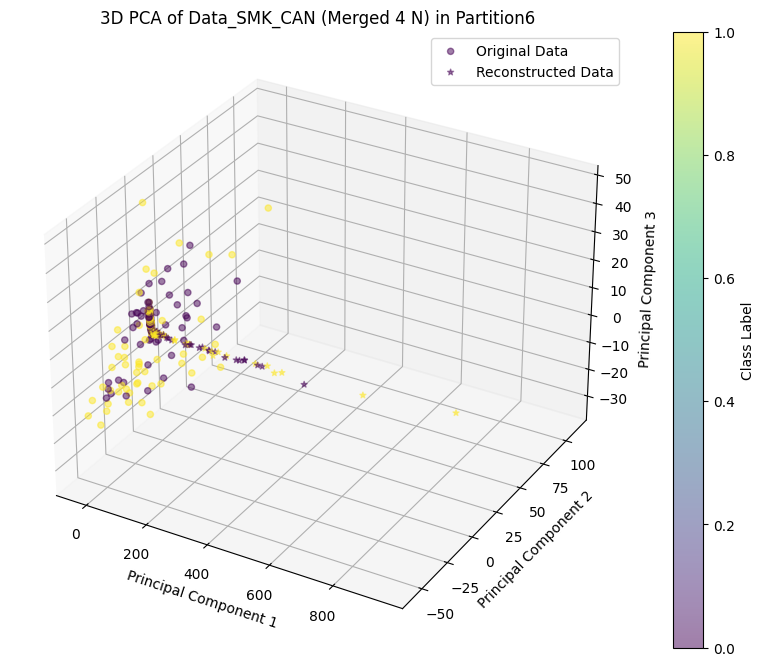

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition7/combined_train_2n.csv


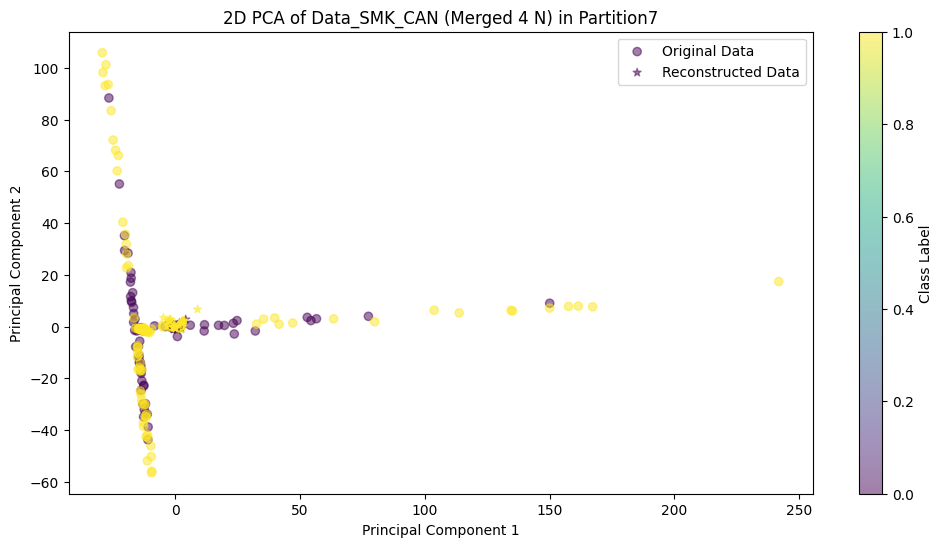

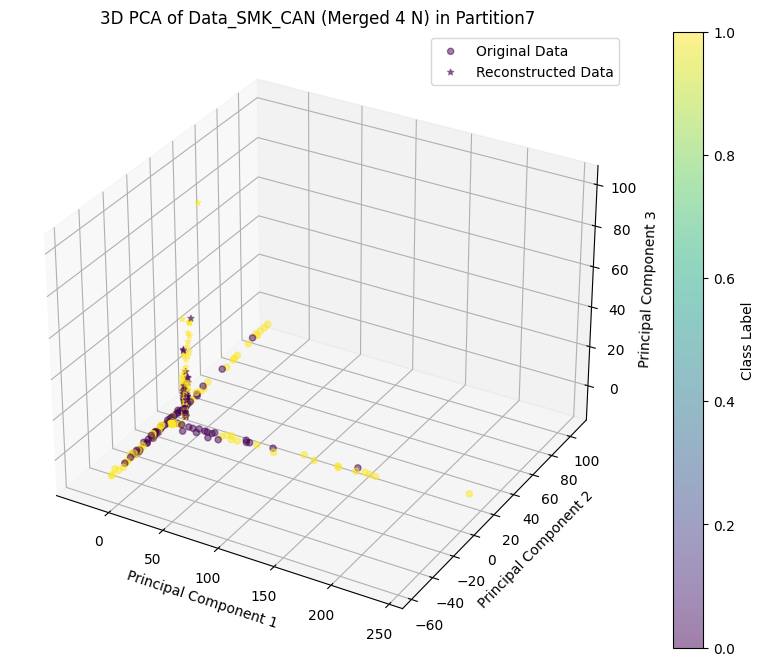

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition0/combined_train_2n.csv


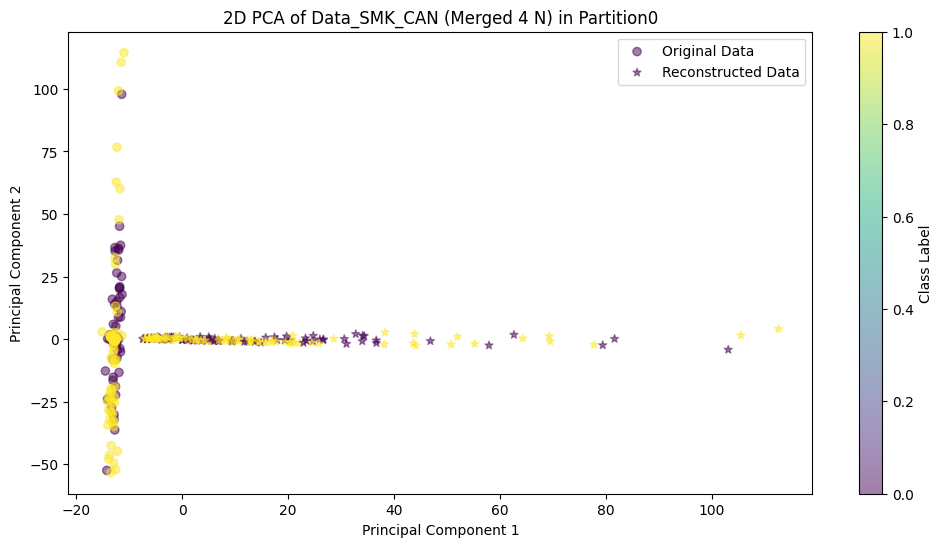

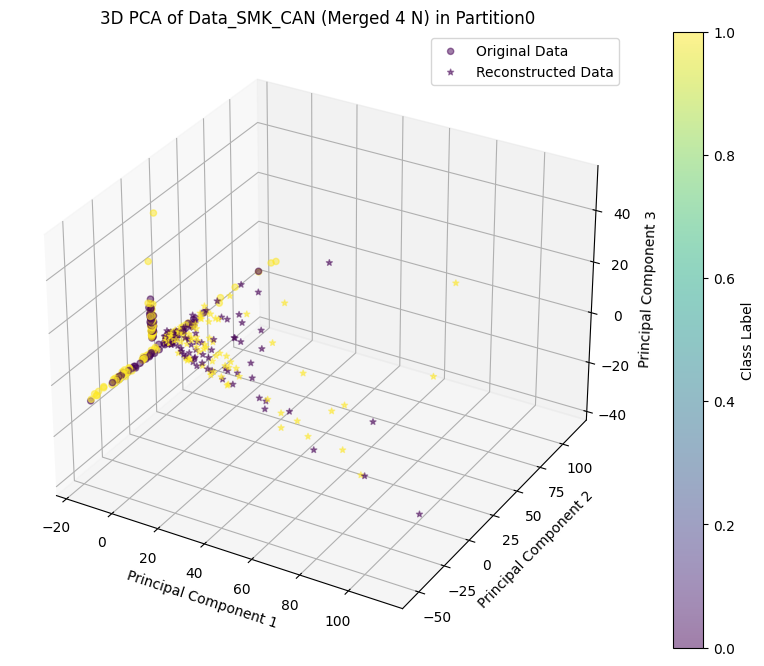

Processing /content/drive/MyDrive/Data/SMK_CAN/Partition13/combined_train_2n.csv


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from torch import nn, optim
from torch.nn import functional as F
import torch.utils.data as Data
from mpl_toolkits.mplot3d import Axes3D  # Import necessary for 3D plotting

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class VAE(nn.Module):
    def __init__(self, data_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(data_dim, 400)
        self.fc21 = nn.Linear(400, 20)  # Latent space dimension can be adjusted
        self.fc22 = nn.Linear(400, 20)
        self.fc3 = nn.Linear(20, 400)
        self.fc4 = nn.Linear(400, data_dim)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return self.fc4(h3)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

def loss_function(recon_x, x, mu, logvar):
    MSE = F.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return MSE + KLD

def process_data(file_path):
    data = np.loadtxt(file_path, delimiter=',', skiprows=1)
    X = data[:, :-1]  # Features
    y = data[:, -1]   # Labels
    data_dim = X.shape[1]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = VAE(data_dim).to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    tensor_data = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    data_loader = Data.DataLoader(tensor_data, batch_size=256, shuffle=True)

    model.train()
    for epoch in range(50):
        for data in data_loader:
            optimizer.zero_grad()
            reconstructed, mu, logvar = model(data)
            loss = loss_function(reconstructed, data, mu, logvar)
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
        reconstructed, _, _ = model(tensor_data)
        reconstructed = reconstructed.cpu().numpy()

    original_data = scaler.inverse_transform(X_scaled)
    reconstructed_data = scaler.inverse_transform(reconstructed)

    combined_data = np.vstack((original_data, reconstructed_data))
    combined_labels = np.concatenate((y, y))
    output_array = np.hstack((combined_data, combined_labels.reshape(-1, 1)))
    np.savetxt(os.path.join(os.path.dirname(file_path), 'combined_train_4n.csv'), output_array, delimiter=',')

    # Save only the reconstructed data as augmented_n.csv
    augmented_data = np.hstack((reconstructed_data, y.reshape(-1, 1)))
    np.savetxt(os.path.join(os.path.dirname(file_path), 'augmented_2n.csv'), augmented_data, delimiter=',')

    df_tensor = torch.from_numpy(combined_data).float()
    df_tensor = df_tensor.to(device)

    x = df_tensor[:, :-1]
    y = df_tensor[:, -1].int()

    x = df_tensor[:, :-1].cpu().numpy()  # Convert to NumPy array and ensure it's on CPU for sklearn
    y = df_tensor[:, -1].int()
    from sklearn.decomposition import PCA
    # Apply PCA using sklearn
    pca = PCA(n_components=3)
    combined_data_pca = pca.fit_transform(x)

    # 2D PCA Plot
    plt.figure(figsize=(12, 6))
    plt.scatter(combined_data_pca[:len(original_data), 0], combined_data_pca[:len(original_data), 1],
                c=combined_labels[:len(original_data)], marker='o', label='Original Data', alpha=0.5, cmap='viridis')
    plt.scatter(combined_data_pca[len(original_data):, 0], combined_data_pca[len(original_data):, 1],
                c=combined_labels[len(original_data):], marker='*', label='Reconstructed Data', alpha=0.5, cmap='viridis')
    plt.title(f'2D PCA of Data_SMK_CAN (Merged 4 N) in {os.path.basename(os.path.dirname(file_path))}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Class Label')
    plt.legend()
    plt.show()

    # 3D PCA Plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(combined_data_pca[:len(original_data), 0], combined_data_pca[:len(original_data), 1],
                         combined_data_pca[:len(original_data), 2], c=combined_labels[:len(original_data)],
                         marker='o', label='Original Data', alpha=0.5, cmap='viridis')
    ax.scatter(combined_data_pca[len(original_data):, 0], combined_data_pca[len(original_data):, 1],
               combined_data_pca[len(original_data):, 2], c=combined_labels[len(original_data):],
               marker='*', label='Reconstructed Data', alpha=0.5, cmap='viridis')
    ax.set_title(f'3D PCA of Data_SMK_CAN (Merged 4 N) in {os.path.basename(os.path.dirname(file_path))}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    fig.colorbar(scatter, ax=ax, label='Class Label')
    ax.legend()
    plt.show()

root_dir = '/content/drive/MyDrive/Data/SMK_CAN'

for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith('combined_train_2n.csv'):
            file_path = os.path.join(subdir, file)
            print(f"Processing {file_path}")
            process_data(file_path)


In [ ]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def load_data_from_folder(folder_path):
    train_data_list = []
    test_data_list = []

    for sub_folder in sorted(os.listdir(folder_path)):
        full_path = os.path.join(folder_path, sub_folder)
        if os.path.isdir(full_path):
            train_file_path = os.path.join(full_path, 'combined_train_2n.csv')
            test_file_path = os.path.join(full_path, 'test_data.csv')

            try:
                train_data = pd.read_csv(train_file_path)
                test_data = pd.read_csv(test_file_path)

                # Assuming the last column is the target
                train_data_list.append(train_data.values)
                test_data_list.append(test_data.values)

            except FileNotFoundError:
                print(f"Missing file in {sub_folder}")
            except Exception as e:
                print(f"An error occurred while loading data from {sub_folder}: {e}")

    return train_data_list, test_data_list

def main(folder_path):
    train_data_list, test_data_list = load_data_from_folder(folder_path)
    mean_acc_rf = []
    mean_acc_knn = []

    for i, (train_data, test_data) in enumerate(zip(train_data_list, test_data_list)):
        X_train, y_train = train_data[:, :-1], train_data[:, -1]
        X_test, y_test = test_data[:, :-1], test_data[:, -1]

        # Train RandomForest model
        rf_model = RandomForestClassifier(n_estimators=100)
        rf_model.fit(X_train, y_train)
        rf_predictions = rf_model.predict(X_test)
        rf_accuracy = accuracy_score(y_test, rf_predictions)
        mean_acc_rf.append(rf_accuracy)

        # Train KNN model
        knn_model = KNeighborsClassifier(n_neighbors=5)
        knn_model.fit(X_train, y_train)
        knn_predictions = knn_model.predict(X_test)
        knn_accuracy = accuracy_score(y_test, knn_predictions)
        mean_acc_knn.append(knn_accuracy)

        print(f"Partition {i+1}: RF Accuracy = {rf_accuracy:.4f}, KNN Accuracy = {knn_accuracy:.4f}")

    # Calculate and print mean accuracy for each model
    mean_accuracy_rf = sum(mean_acc_rf) / len(mean_acc_rf)
    mean_accuracy_knn = sum(mean_acc_knn) / len(mean_acc_knn)
    print(f"Mean RF Accuracy of Combined 2n: {mean_accuracy_rf:.4f}")
    print(f"Mean KNN Accuracy Combined 2n: {mean_accuracy_knn:.4f}")

if __name__ == "__main__":
    folder_path = '/content/drive/MyDrive/Data/SMK_CAN'
    main(folder_path)


Partition 1: RF Accuracy = 0.6774, KNN Accuracy = 0.6237
Partition 2: RF Accuracy = 0.6559, KNN Accuracy = 0.5591
Partition 3: RF Accuracy = 0.7204, KNN Accuracy = 0.5914
Partition 4: RF Accuracy = 0.6344, KNN Accuracy = 0.6559
Partition 5: RF Accuracy = 0.6022, KNN Accuracy = 0.5914
Partition 6: RF Accuracy = 0.6452, KNN Accuracy = 0.6559
Partition 7: RF Accuracy = 0.7204, KNN Accuracy = 0.5914
Partition 8: RF Accuracy = 0.7742, KNN Accuracy = 0.6022
Partition 9: RF Accuracy = 0.6559, KNN Accuracy = 0.6237
Partition 10: RF Accuracy = 0.6559, KNN Accuracy = 0.6559
Partition 11: RF Accuracy = 0.7097, KNN Accuracy = 0.5591
Partition 12: RF Accuracy = 0.6774, KNN Accuracy = 0.6129
Partition 13: RF Accuracy = 0.6882, KNN Accuracy = 0.5914
Partition 14: RF Accuracy = 0.6882, KNN Accuracy = 0.5161
Partition 15: RF Accuracy = 0.6022, KNN Accuracy = 0.5591
Partition 16: RF Accuracy = 0.7097, KNN Accuracy = 0.6237
Partition 17: RF Accuracy = 0.6774, KNN Accuracy = 0.6237
Partition 18: RF Accura

In [ ]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def load_data_from_folder(folder_path):
    train_data_list = []
    test_data_list = []

    for sub_folder in sorted(os.listdir(folder_path)):
        full_path = os.path.join(folder_path, sub_folder)
        if os.path.isdir(full_path):
            train_file_path = os.path.join(full_path, 'combined_train_4n.csv')
            test_file_path = os.path.join(full_path, 'test_data.csv')

            try:
                train_data = pd.read_csv(train_file_path)
                test_data = pd.read_csv(test_file_path)

                # Assuming the last column is the target
                train_data_list.append(train_data.values)
                test_data_list.append(test_data.values)

            except FileNotFoundError:
                print(f"Missing file in {sub_folder}")
            except Exception as e:
                print(f"An error occurred while loading data from {sub_folder}: {e}")

    return train_data_list, test_data_list

def main(folder_path):
    train_data_list, test_data_list = load_data_from_folder(folder_path)
    mean_acc_rf = []
    mean_acc_knn = []

    for i, (train_data, test_data) in enumerate(zip(train_data_list, test_data_list)):
        X_train, y_train = train_data[:, :-1], train_data[:, -1]
        X_test, y_test = test_data[:, :-1], test_data[:, -1]

        # Train RandomForest model
        rf_model = RandomForestClassifier(n_estimators=100)
        rf_model.fit(X_train, y_train)
        rf_predictions = rf_model.predict(X_test)
        rf_accuracy = accuracy_score(y_test, rf_predictions)
        mean_acc_rf.append(rf_accuracy)

        # Train KNN model
        knn_model = KNeighborsClassifier(n_neighbors=5)
        knn_model.fit(X_train, y_train)
        knn_predictions = knn_model.predict(X_test)
        knn_accuracy = accuracy_score(y_test, knn_predictions)
        mean_acc_knn.append(knn_accuracy)

        print(f"Partition {i}: RF Accuracy = {rf_accuracy:.4f}, KNN Accuracy = {knn_accuracy:.4f}")

    # Calculate and print mean accuracy for each model
    mean_accuracy_rf = sum(mean_acc_rf) / len(mean_acc_rf)
    mean_accuracy_knn = sum(mean_acc_knn) / len(mean_acc_knn)
    print(f"Mean RF Accuracy of Combined 4n: {mean_accuracy_rf:.4f}")
    print(f"Mean KNN Accuracy of Combined 4n: {mean_accuracy_knn:.4f}")

if __name__ == "__main__":
    folder_path = '/content/drive/MyDrive/Data/SMK_CAN'
    main(folder_path)


Missing file in Partition1
Missing file in Partition12
Missing file in Partition14
Missing file in Partition15
Missing file in Partition2
Missing file in Partition3
Missing file in Partition4
Missing file in Partition5
Missing file in Partition8
Partition 0: RF Accuracy = 0.6774, KNN Accuracy = 0.6559
Partition 1: RF Accuracy = 0.6774, KNN Accuracy = 0.5914
Partition 2: RF Accuracy = 0.6882, KNN Accuracy = 0.6344


ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def load_data_from_folder(folder_path):
    train_data_list = []
    test_data_list = []

    for sub_folder in sorted(os.listdir(folder_path)):
        full_path = os.path.join(folder_path, sub_folder)
        if os.path.isdir(full_path):
            train_file_path = os.path.join(full_path, 'train_data.csv')
            test_file_path = os.path.join(full_path, 'test_data.csv')

            try:
                train_data = pd.read_csv(train_file_path)
                test_data = pd.read_csv(test_file_path)

                # Assuming the last column is the target
                train_data_list.append(train_data.values)
                test_data_list.append(test_data.values)

            except FileNotFoundError:
                print(f"Missing file in {sub_folder}")
            except Exception as e:
                print(f"An error occurred while loading data from {sub_folder}: {e}")

    return train_data_list, test_data_list

def main(folder_path):
    train_data_list, test_data_list = load_data_from_folder(folder_path)
    mean_acc_rf = []
    mean_acc_knn = []

    for i, (train_data, test_data) in enumerate(zip(train_data_list, test_data_list)):
        X_train, y_train = train_data[:, :-1], train_data[:, -1]
        X_test, y_test = test_data[:, :-1], test_data[:, -1]

        # Train RandomForest model
        rf_model = RandomForestClassifier(n_estimators=100)
        rf_model.fit(X_train, y_train)
        rf_predictions = rf_model.predict(X_test)
        rf_accuracy = accuracy_score(y_test, rf_predictions)
        mean_acc_rf.append(rf_accuracy)

        # Train KNN model
        knn_model = KNeighborsClassifier(n_neighbors=5)
        knn_model.fit(X_train, y_train)
        knn_predictions = knn_model.predict(X_test)
        knn_accuracy = accuracy_score(y_test, knn_predictions)
        mean_acc_knn.append(knn_accuracy)

        print(f"Partition {i}: RF Accuracy = {rf_accuracy:.4f}, KNN Accuracy = {knn_accuracy:.4f}")

    # Calculate and print mean accuracy for each model
    mean_accuracy_rf = sum(mean_acc_rf) / len(mean_acc_rf)
    mean_accuracy_knn = sum(mean_acc_knn) / len(mean_acc_knn)
    print(f"Mean RF Accuracy of Origibal Train Data: {mean_accuracy_rf:.4f}")
    print(f"Mean KNN Accuracy of Original Train Data: {mean_accuracy_knn:.4f}")

if __name__ == "__main__":
    folder_path = '/content/drive/MyDrive/Data/SMK_CAN'
    main(folder_path)


Partition 0: RF Accuracy = 0.6667, KNN Accuracy = 0.6559
Partition 1: RF Accuracy = 0.6129, KNN Accuracy = 0.6774
Partition 2: RF Accuracy = 0.6989, KNN Accuracy = 0.6559
Partition 3: RF Accuracy = 0.6559, KNN Accuracy = 0.6452
Partition 4: RF Accuracy = 0.6344, KNN Accuracy = 0.6452
Partition 5: RF Accuracy = 0.7312, KNN Accuracy = 0.6667
Partition 6: RF Accuracy = 0.6882, KNN Accuracy = 0.6882
Partition 7: RF Accuracy = 0.7097, KNN Accuracy = 0.6129
Partition 8: RF Accuracy = 0.6774, KNN Accuracy = 0.6882
Partition 9: RF Accuracy = 0.6452, KNN Accuracy = 0.6774
Partition 10: RF Accuracy = 0.7419, KNN Accuracy = 0.6452
Partition 11: RF Accuracy = 0.6667, KNN Accuracy = 0.6559
Partition 12: RF Accuracy = 0.6989, KNN Accuracy = 0.6774
Partition 13: RF Accuracy = 0.6667, KNN Accuracy = 0.6774
Partition 14: RF Accuracy = 0.6022, KNN Accuracy = 0.6129
Partition 15: RF Accuracy = 0.7097, KNN Accuracy = 0.6774
Partition 16: RF Accuracy = 0.7097, KNN Accuracy = 0.6452
Partition 17: RF Accurac

In [ ]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def load_data_from_folder(folder_path):
    train_data_list = []
    test_data_list = []

    for sub_folder in sorted(os.listdir(folder_path)):
        full_path = os.path.join(folder_path, sub_folder)
        if os.path.isdir(full_path):
            train_file_path = os.path.join(full_path, 'augmented_2n.csv')
            test_file_path = os.path.join(full_path, 'test_data.csv')

            try:
                train_data = pd.read_csv(train_file_path)
                test_data = pd.read_csv(test_file_path)

                # Assuming the last column is the target
                train_data_list.append(train_data.values)
                test_data_list.append(test_data.values)

            except FileNotFoundError:
                print(f"Missing file in {sub_folder}")
            except Exception as e:
                print(f"An error occurred while loading data from {sub_folder}: {e}")

    return train_data_list, test_data_list

def main(folder_path):
    train_data_list, test_data_list = load_data_from_folder(folder_path)
    mean_acc_rf = []
    mean_acc_knn = []

    for i, (train_data, test_data) in enumerate(zip(train_data_list, test_data_list)):
        X_train, y_train = train_data[:, :-1], train_data[:, -1]
        X_test, y_test = test_data[:, :-1], test_data[:, -1]

        # Train RandomForest model
        rf_model = RandomForestClassifier(n_estimators=100)
        rf_model.fit(X_train, y_train)
        rf_predictions = rf_model.predict(X_test)
        rf_accuracy = accuracy_score(y_test, rf_predictions)
        mean_acc_rf.append(rf_accuracy)

        # Train KNN model
        knn_model = KNeighborsClassifier(n_neighbors=5)
        knn_model.fit(X_train, y_train)
        knn_predictions = knn_model.predict(X_test)
        knn_accuracy = accuracy_score(y_test, knn_predictions)
        mean_acc_knn.append(knn_accuracy)

        print(f"Partition {i}: RF Accuracy = {rf_accuracy:.4f}, KNN Accuracy = {knn_accuracy:.4f}")

    # Calculate and print mean accuracy for each model
    mean_accuracy_rf = sum(mean_acc_rf) / len(mean_acc_rf)
    mean_accuracy_knn = sum(mean_acc_knn) / len(mean_acc_knn)
    print(f"Mean RF Accuracy of Augmented 2n: {mean_accuracy_rf:.4f}")
    print(f"Mean KNN Accuracy of Augmented 2n: {mean_accuracy_knn:.4f}")

if __name__ == "__main__":
    folder_path = '/content/drive/MyDrive/Data/SMK_CAN'
    main(folder_path)


Missing file in Partition1
Missing file in Partition12
Missing file in Partition14
Missing file in Partition15
Missing file in Partition2
Missing file in Partition3
Missing file in Partition4
Missing file in Partition5
Missing file in Partition8
Partition 0: RF Accuracy = 0.5699, KNN Accuracy = 0.5376
Partition 1: RF Accuracy = 0.4731, KNN Accuracy = 0.4839
Partition 2: RF Accuracy = 0.4946, KNN Accuracy = 0.4946


ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def load_data_from_folder(folder_path):
    train_data_list = []
    test_data_list = []

    for sub_folder in sorted(os.listdir(folder_path)):
        full_path = os.path.join(folder_path, sub_folder)
        if os.path.isdir(full_path):
            train_file_path = os.path.join(full_path, 'augmented_n.csv')
            test_file_path = os.path.join(full_path, 'test_data.csv')

            try:
                train_data = pd.read_csv(train_file_path)
                test_data = pd.read_csv(test_file_path)

                # Assuming the last column is the target
                train_data_list.append(train_data.values)
                test_data_list.append(test_data.values)

            except FileNotFoundError:
                print(f"Missing file in {sub_folder}")
            except Exception as e:
                print(f"An error occurred while loading data from {sub_folder}: {e}")

    return train_data_list, test_data_list

def main(folder_path):
    train_data_list, test_data_list = load_data_from_folder(folder_path)
    mean_acc_rf = []
    mean_acc_knn = []

    for i, (train_data, test_data) in enumerate(zip(train_data_list, test_data_list)):
        X_train, y_train = train_data[:, :-1], train_data[:, -1]
        X_test, y_test = test_data[:, :-1], test_data[:, -1]

        # Train RandomForest model
        rf_model = RandomForestClassifier(n_estimators=100)
        rf_model.fit(X_train, y_train)
        rf_predictions = rf_model.predict(X_test)
        rf_accuracy = accuracy_score(y_test, rf_predictions)
        mean_acc_rf.append(rf_accuracy)

        # Train KNN model
        knn_model = KNeighborsClassifier(n_neighbors=5)
        knn_model.fit(X_train, y_train)
        knn_predictions = knn_model.predict(X_test)
        knn_accuracy = accuracy_score(y_test, knn_predictions)
        mean_acc_knn.append(knn_accuracy)

        print(f"Partition {i}: RF Accuracy = {rf_accuracy:.4f}, KNN Accuracy = {knn_accuracy:.4f}")

    # Calculate and print mean accuracy for each model
    mean_accuracy_rf = sum(mean_acc_rf) / len(mean_acc_rf)
    mean_accuracy_knn = sum(mean_acc_knn) / len(mean_acc_knn)
    print(f"Mean RF Accuracy  of Augmented n: {mean_accuracy_rf:.4f}")
    print(f"Mean KNN Accuracy Augmented n: {mean_accuracy_knn:.4f}")

if __name__ == "__main__":
    folder_path = '/content/drive/MyDrive/Data/SMK_CAN'
    main(folder_path)


Partition 0: RF Accuracy = 0.4409, KNN Accuracy = 0.5269
Partition 1: RF Accuracy = 0.4839, KNN Accuracy = 0.5054
Partition 2: RF Accuracy = 0.5269, KNN Accuracy = 0.4086
Partition 3: RF Accuracy = 0.5376, KNN Accuracy = 0.5376
Partition 4: RF Accuracy = 0.5376, KNN Accuracy = 0.4839
Partition 5: RF Accuracy = 0.3871, KNN Accuracy = 0.4946
Partition 6: RF Accuracy = 0.5591, KNN Accuracy = 0.4946
Partition 7: RF Accuracy = 0.6129, KNN Accuracy = 0.5806
Partition 8: RF Accuracy = 0.4516, KNN Accuracy = 0.6129
Partition 9: RF Accuracy = 0.3978, KNN Accuracy = 0.5376
Partition 10: RF Accuracy = 0.5161, KNN Accuracy = 0.5376
Partition 11: RF Accuracy = 0.4086, KNN Accuracy = 0.4839
Partition 12: RF Accuracy = 0.4839, KNN Accuracy = 0.4946
Partition 13: RF Accuracy = 0.4839, KNN Accuracy = 0.5161
Partition 14: RF Accuracy = 0.4946, KNN Accuracy = 0.4839
Partition 15: RF Accuracy = 0.3978, KNN Accuracy = 0.5161
Partition 16: RF Accuracy = 0.4194, KNN Accuracy = 0.4409
Partition 17: RF Accurac

In [ ]:
import pandas as pd

# Load the data
df = pd.read_pickle('/content/drive/MyDrive/Data/GLIOMA/Partition0/SLCE_features.p')

# Check the type of df
df_1 = pd.read_pickle('/content/drive/MyDrive/Data/GLIOMA/Partition0/trnData.p')
#print(df_1)
# Assuming df is already a loaded tensor object
# Convert the first 50 elements of the tensor to a list
first_50_elements = df[:50].tolist()

# Print the list
print(first_50_elements)

df_1=df_1[:,first_50_elements]
print(df_1.shape)
